# Support Vector Machine - Hourly Taxi Demand Prediction

In this section we predict the hourly demand of taxi trips in Chicago. 
The prediciton we perform by building a model are based on data from 2013, provided from Chicago (website: https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew).

We split the prediction into spatial units:
- Community Areas
- hexagons with low resolution
- hexagons with medium resolution
- hexagons with high resolution

For each of the units we perform a seperate prediction based on data we have aggregeated in our preparation.

For that we proceed as follows:

- Build SVM model with different kernels to find out which performs best. We do this based on Community areas.
- Hyperparameter tuning to find the best ones
- Build the model with found kernel and hyperparameters: make predictions for all spatial units
- Evaluation

<hr style="border: 1px solid #8888;">

In [6]:
# import all necessary packages
import pandas as pd
import numpy as np
import json
import datetime
import warnings
from pandas.core.common import SettingWithCopyWarning

#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
#import seaborn as sns
#import matplotlib as mlp
import matplotlib.pyplot as plt
#from datetime import datetime

from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR
from sklearn import datasets

from scipy.stats import loguniform

import predictive as pred

In [7]:
# import datasets
df_h_comar = pd.read_csv("data/datasets/df_h_comar.csv")
df_h_hexlow = pd.read_csv("data/datasets/df_h_hexlow.csv")
df_h_hexmed = pd.read_csv("data/datasets/df_h_hexmed.csv")
df_h_hexhig = pd.read_csv("data/datasets/df_h_hexhig.csv")

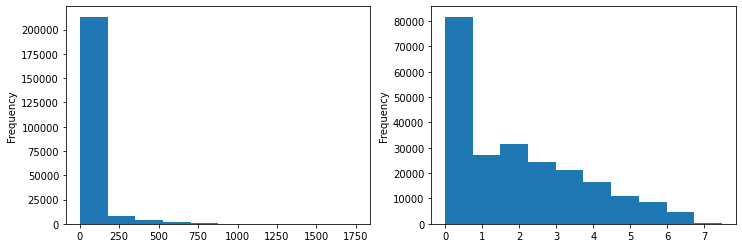

In [8]:
plt.figure(figsize=(12,4)) 

plt.subplot(121)  
df_h_comar['numOfTaxis_area'].plot.hist()

plt.subplot(122)
df_h_comar['numOfTaxis_area'] = np.log(df_h_comar['numOfTaxis_area'])
df_h_comar['numOfTaxis_area'].plot.hist()
plt.show()

In [3]:
df_h_comar.drop(columns = ['date_start'],inplace = True)
df_h_hexlow.drop(columns = ['date_start'],inplace = True)
df_h_hexmed.drop(columns = ['date_start'],inplace = True)
df_h_hexhig.drop(columns = ['date_start'],inplace = True)

In [4]:
df_h_comar = pred.dayandseas_to_int(df_h_comar)
df_h_hexlow = pred.dayandseas_to_int(df_h_hexlow)
df_h_hexmed = pred.dayandseas_to_int(df_h_hexmed)
df_h_hexhig = pred.dayandseas_to_int(df_h_hexhig)

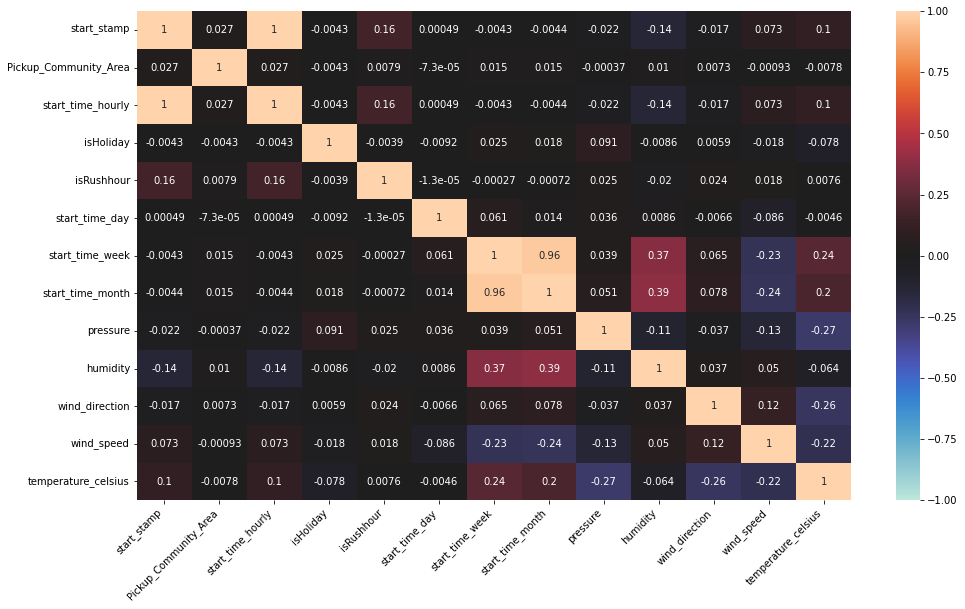

In [11]:
# correlation matrix of df_h_comar

import seaborn as sns
corr = df_h_comar.drop(columns = ['numOfTaxis_area']).corr()
plt.figure(figsize = (16,9))
ax = sns.heatmap(corr, vmin = -1, vmax= 1, center = 0, annot=True)

ax.set_xticklabels(ax.get_xticklabels(),
                  rotation = 45,
                  horizontalalignment = 'right')

ax.set_yticklabels(ax.get_yticklabels(),
                   rotation =0,
                   horizontalalignment = 'right')

plt.show()

Because we are looking at the hourly demand, `start_time_hourly` and `start_stamp` is the same. So there are perfectly correlated and we are dropping `start_time_hourly`. We have a very high correlation between `start_time_month` and `start_time_week`, which leads to dropping `start_time_month`:

In [5]:
df_h_comar.drop(columns = ['start_time_hourly'],inplace = True)

In [ ]:
df_24h_comar.drop(columns = ['start_time_month'],inplace = True)

<hr style="border: 1px solid #8888;">

## Hourly Demand - Community Area

In [6]:
x_train_val, y_train_val, x_train, y_train, x_val, y_val, x_test, y_test = pred.train_val_test(df_h_comar,
                                                                                        testsize=0.3,
                                                                                        valsize=0.2)

In [7]:
categoric, numeric = pred.cat_and_num('Pickup_Community_Area')

### Building the model: Checking for the best kernel

#### SVR KERNEL: LINEAR

In [6]:
svr_lin = SVR(kernel = 'linear',verbose = 10,cache_size=15000, max_iter=50000)

In [7]:
pipeline = pred.pipeline_fit_predict(svr_lin, categoric, numeric, x_train_val, y_train_val, x_test, y_test,
                               df_h_comar, 'numOfTaxis_area')

[LibSVM].................................................WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50000
obj = -3363473.268517, rho = -11.201561
nSV = 95981, nBSV = 95028


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MODEL SCORES:
MAE:  23.337
MSE:  4498.339
RMSE:  67.070
Accuracy: 40.8 %
R2:  56.381 %
Max Residual Error:  1446.159


#### SVR KERNEL: POLYNOMIAL WITH DEGREE 2

In [18]:
svr_poly2 = SVR(kernel = 'poly',degree = 2, verbose = 10,cache_size=15000, max_iter=50000)

In [19]:
pipeline = pipeline_fit_predict(svr_poly, categoric, numeric, x_train_val, y_train_val, x_test, y_test,
                                df_h_comar, 'numOfTaxis_area')

[LibSVM].................................................WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50000
obj = -4735355.356241, rho = -6.414818
nSV = 99966, nBSV = 99966


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MODEL SCORES:
MAE:  26.649
MSE:  7286.713
RMSE:  85.362
Accuracy: 32.39 %
R2:  29.343 %
Max Residual Error:  1635.635


#### SVR KERNEL: POLYNOMIAL WITH DEGREE 3

In [13]:
svr_poly3 = SVR(kernel = 'poly',verbose = 10,cache_size=15000, max_iter=50000)

In [14]:
pipeline = pipeline_fit_predict(svr_poly3, categoric, numeric, x_train_val, y_train_val, x_test, y_test,
                                df_h_comar, 'numOfTaxis_area')

[LibSVM].................................................WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50000
obj = -5031586.430808, rho = 4.514757
nSV = 99968, nBSV = 99968


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MODEL SCORES:
MAE:  35.897
MSE:  8870.264
RMSE:  94.182
Accuracy: 8.93 %
R2:  13.987 %
Max Residual Error:  1689.392


#### SVR KERNEL: RBF

In [16]:
svr_rbf = SVR(kernel = 'rbf',verbose = 10,cache_size=15000, max_iter=50000)

In [17]:
pipeline = pipeline_fit_predict(svr_rbf, categoric, numeric, x_train_val, y_train_val, x_test, y_test,
                                df_h_comar, 'numOfTaxis_area')

[LibSVM].................................................WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50000
obj = -4792854.643942, rho = -6.669636
nSV = 99984, nBSV = 99984


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MODEL SCORES:
MAE:  26.690
MSE:  7261.736
RMSE:  85.216
Accuracy: 32.29 %
R2:  29.585 %
Max Residual Error:  1634.289


<hr style="border: 0.5px solid #8888;">

### Hyperparameter Tuning for the best model

#### Sampling data for tuning:

In [8]:
x_val, y_val = pred.sampling_already_splitted(x_val, y_val, 'numOfTaxis_area', 5000)

In [9]:
# creating the ranges for model parameter to use in find_best_hyperparameters

model_para = {'model__C':loguniform(1e-1, 1e2),        
                'model__epsilon':loguniform(1e-1, 1e2)}               

In [10]:
svr_lin = SVR(kernel = 'linear',cache_size=15000, max_iter=50000)

In [11]:
pipeline = pred.pipeline_for_prediction(categoric, numeric, svr_lin)

In [12]:
pred.find_best_hyperparameters(pipeline, x_val, y_val, model_para, score = 'neg_mean_absolute_error', verbose=10)

Running grid search for the model based on neg_mean_absolute_error
Fitting 15 folds for each of 50 candidates, totalling 750 fits
[CV 1/15; 1/50] START model__C=1.3292918943162166, model__epsilon=71.14476009343416


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/15; 1/50] END model__C=1.3292918943162166, model__epsilon=71.14476009343416;, score=-70.542 total time=   0.3s
[CV 2/15; 1/50] START model__C=1.3292918943162166, model__epsilon=71.14476009343416
[CV 2/15; 1/50] END model__C=1.3292918943162166, model__epsilon=71.14476009343416;, score=-68.987 total time=   0.3s
[CV 3/15; 1/50] START model__C=1.3292918943162166, model__epsilon=71.14476009343416
[CV 3/15; 1/50] END model__C=1.3292918943162166, model__epsilon=71.14476009343416;, score=-71.832 total time=   0.3s
[CV 4/15; 1/50] START model__C=1.3292918943162166, model__epsilon=71.14476009343416
[CV 4/15; 1/50] END model__C=1.3292918943162166, model__epsilon=71.14476009343416;, score=-67.826 total time=   0.3s
[CV 5/15; 1/50] START model__C=1.3292918943162166, model__epsilon=71.14476009343416
[CV 5/15; 1/50] END model__C=1.3292918943162166, model__epsilon=71.14476009343416;, score=-67.374 total time=   0.3s
[CV 6/15; 1/50] START model__C=1.3292918943162166, model__epsilon=71.1447600934

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 2/50] END model__C=15.702970884055382, model__epsilon=6.2513735745217485;, score=-26.649 total time=   1.1s
[CV 2/15; 2/50] START model__C=15.702970884055382, model__epsilon=6.2513735745217485


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 2/50] END model__C=15.702970884055382, model__epsilon=6.2513735745217485;, score=-24.289 total time=   1.1s
[CV 3/15; 2/50] START model__C=15.702970884055382, model__epsilon=6.2513735745217485


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 2/50] END model__C=15.702970884055382, model__epsilon=6.2513735745217485;, score=-27.637 total time=   1.1s
[CV 4/15; 2/50] START model__C=15.702970884055382, model__epsilon=6.2513735745217485


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 2/50] END model__C=15.702970884055382, model__epsilon=6.2513735745217485;, score=-23.575 total time=   1.1s
[CV 5/15; 2/50] START model__C=15.702970884055382, model__epsilon=6.2513735745217485


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 2/50] END model__C=15.702970884055382, model__epsilon=6.2513735745217485;, score=-23.704 total time=   1.1s
[CV 6/15; 2/50] START model__C=15.702970884055382, model__epsilon=6.2513735745217485


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 2/50] END model__C=15.702970884055382, model__epsilon=6.2513735745217485;, score=-26.121 total time=   1.1s
[CV 7/15; 2/50] START model__C=15.702970884055382, model__epsilon=6.2513735745217485


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 2/50] END model__C=15.702970884055382, model__epsilon=6.2513735745217485;, score=-24.245 total time=   1.1s
[CV 8/15; 2/50] START model__C=15.702970884055382, model__epsilon=6.2513735745217485


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 2/50] END model__C=15.702970884055382, model__epsilon=6.2513735745217485;, score=-27.189 total time=   1.1s
[CV 9/15; 2/50] START model__C=15.702970884055382, model__epsilon=6.2513735745217485


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 2/50] END model__C=15.702970884055382, model__epsilon=6.2513735745217485;, score=-23.969 total time=   1.1s
[CV 10/15; 2/50] START model__C=15.702970884055382, model__epsilon=6.2513735745217485


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 2/50] END model__C=15.702970884055382, model__epsilon=6.2513735745217485;, score=-24.711 total time=   1.1s
[CV 11/15; 2/50] START model__C=15.702970884055382, model__epsilon=6.2513735745217485


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 2/50] END model__C=15.702970884055382, model__epsilon=6.2513735745217485;, score=-26.338 total time=   1.1s
[CV 12/15; 2/50] START model__C=15.702970884055382, model__epsilon=6.2513735745217485


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 2/50] END model__C=15.702970884055382, model__epsilon=6.2513735745217485;, score=-24.400 total time=   1.1s
[CV 13/15; 2/50] START model__C=15.702970884055382, model__epsilon=6.2513735745217485


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 2/50] END model__C=15.702970884055382, model__epsilon=6.2513735745217485;, score=-27.277 total time=   1.0s
[CV 14/15; 2/50] START model__C=15.702970884055382, model__epsilon=6.2513735745217485


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 2/50] END model__C=15.702970884055382, model__epsilon=6.2513735745217485;, score=-23.357 total time=   1.0s
[CV 15/15; 2/50] START model__C=15.702970884055382, model__epsilon=6.2513735745217485


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 2/50] END model__C=15.702970884055382, model__epsilon=6.2513735745217485;, score=-24.276 total time=   1.1s
[CV 1/15; 3/50] START model__C=0.2938027938703535, model__epsilon=0.2937538457632829
[CV 1/15; 3/50] END model__C=0.2938027938703535, model__epsilon=0.2937538457632829;, score=-31.745 total time=   1.2s
[CV 2/15; 3/50] START model__C=0.2938027938703535, model__epsilon=0.2937538457632829
[CV 2/15; 3/50] END model__C=0.2938027938703535, model__epsilon=0.2937538457632829;, score=-30.037 total time=   1.2s
[CV 3/15; 3/50] START model__C=0.2938027938703535, model__epsilon=0.2937538457632829
[CV 3/15; 3/50] END model__C=0.2938027938703535, model__epsilon=0.2937538457632829;, score=-33.307 total time=   1.2s
[CV 4/15; 3/50] START model__C=0.2938027938703535, model__epsilon=0.2937538457632829
[CV 4/15; 3/50] END model__C=0.2938027938703535, model__epsilon=0.2937538457632829;, score=-29.331 total time=   1.2s
[CV 5/15; 3/50] START model__C=0.2938027938703535, model__epsilon=0.2

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 5/50] END model__C=6.358358856676251, model__epsilon=13.311216080736884;, score=-28.624 total time=   0.6s
[CV 2/15; 5/50] START model__C=6.358358856676251, model__epsilon=13.311216080736884


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 5/50] END model__C=6.358358856676251, model__epsilon=13.311216080736884;, score=-26.351 total time=   0.7s
[CV 3/15; 5/50] START model__C=6.358358856676251, model__epsilon=13.311216080736884


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 5/50] END model__C=6.358358856676251, model__epsilon=13.311216080736884;, score=-29.418 total time=   0.6s
[CV 4/15; 5/50] START model__C=6.358358856676251, model__epsilon=13.311216080736884


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 5/50] END model__C=6.358358856676251, model__epsilon=13.311216080736884;, score=-25.501 total time=   0.7s
[CV 5/15; 5/50] START model__C=6.358358856676251, model__epsilon=13.311216080736884


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 5/50] END model__C=6.358358856676251, model__epsilon=13.311216080736884;, score=-25.174 total time=   0.7s
[CV 6/15; 5/50] START model__C=6.358358856676251, model__epsilon=13.311216080736884


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 5/50] END model__C=6.358358856676251, model__epsilon=13.311216080736884;, score=-27.743 total time=   0.7s
[CV 7/15; 5/50] START model__C=6.358358856676251, model__epsilon=13.311216080736884


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 5/50] END model__C=6.358358856676251, model__epsilon=13.311216080736884;, score=-26.148 total time=   0.7s
[CV 8/15; 5/50] START model__C=6.358358856676251, model__epsilon=13.311216080736884


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 5/50] END model__C=6.358358856676251, model__epsilon=13.311216080736884;, score=-29.199 total time=   0.6s
[CV 9/15; 5/50] START model__C=6.358358856676251, model__epsilon=13.311216080736884


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 5/50] END model__C=6.358358856676251, model__epsilon=13.311216080736884;, score=-26.228 total time=   0.6s
[CV 10/15; 5/50] START model__C=6.358358856676251, model__epsilon=13.311216080736884


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 5/50] END model__C=6.358358856676251, model__epsilon=13.311216080736884;, score=-25.883 total time=   0.6s
[CV 11/15; 5/50] START model__C=6.358358856676251, model__epsilon=13.311216080736884


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 5/50] END model__C=6.358358856676251, model__epsilon=13.311216080736884;, score=-28.189 total time=   0.6s
[CV 12/15; 5/50] START model__C=6.358358856676251, model__epsilon=13.311216080736884


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 5/50] END model__C=6.358358856676251, model__epsilon=13.311216080736884;, score=-26.411 total time=   0.6s
[CV 13/15; 5/50] START model__C=6.358358856676251, model__epsilon=13.311216080736884


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 5/50] END model__C=6.358358856676251, model__epsilon=13.311216080736884;, score=-29.469 total time=   0.6s
[CV 14/15; 5/50] START model__C=6.358358856676251, model__epsilon=13.311216080736884


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 5/50] END model__C=6.358358856676251, model__epsilon=13.311216080736884;, score=-24.880 total time=   0.6s
[CV 15/15; 5/50] START model__C=6.358358856676251, model__epsilon=13.311216080736884


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 5/50] END model__C=6.358358856676251, model__epsilon=13.311216080736884;, score=-25.937 total time=   0.6s
[CV 1/15; 6/50] START model__C=0.115279871282324, model__epsilon=81.23245085588688
[CV 1/15; 6/50] END model__C=0.115279871282324, model__epsilon=81.23245085588688;, score=-83.112 total time=   0.3s
[CV 2/15; 6/50] START model__C=0.115279871282324, model__epsilon=81.23245085588688
[CV 2/15; 6/50] END model__C=0.115279871282324, model__epsilon=81.23245085588688;, score=-81.303 total time=   0.3s
[CV 3/15; 6/50] START model__C=0.115279871282324, model__epsilon=81.23245085588688
[CV 3/15; 6/50] END model__C=0.115279871282324, model__epsilon=81.23245085588688;, score=-84.266 total time=   0.3s
[CV 4/15; 6/50] START model__C=0.115279871282324, model__epsilon=81.23245085588688
[CV 4/15; 6/50] END model__C=0.115279871282324, model__epsilon=81.23245085588688;, score=-80.353 total time=   0.3s
[CV 5/15; 6/50] START model__C=0.115279871282324, model__epsilon=81.23245085588688
[CV

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 7/50] END model__C=31.428808908401084, model__epsilon=0.4335281794951565;, score=-25.897 total time=   2.6s
[CV 2/15; 7/50] START model__C=31.428808908401084, model__epsilon=0.4335281794951565


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 7/50] END model__C=31.428808908401084, model__epsilon=0.4335281794951565;, score=-23.632 total time=   2.6s
[CV 3/15; 7/50] START model__C=31.428808908401084, model__epsilon=0.4335281794951565


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 7/50] END model__C=31.428808908401084, model__epsilon=0.4335281794951565;, score=-27.115 total time=   2.6s
[CV 4/15; 7/50] START model__C=31.428808908401084, model__epsilon=0.4335281794951565


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 7/50] END model__C=31.428808908401084, model__epsilon=0.4335281794951565;, score=-22.951 total time=   2.6s
[CV 5/15; 7/50] START model__C=31.428808908401084, model__epsilon=0.4335281794951565


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 7/50] END model__C=31.428808908401084, model__epsilon=0.4335281794951565;, score=-23.034 total time=   2.6s
[CV 6/15; 7/50] START model__C=31.428808908401084, model__epsilon=0.4335281794951565


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 7/50] END model__C=31.428808908401084, model__epsilon=0.4335281794951565;, score=-25.616 total time=   2.6s
[CV 7/15; 7/50] START model__C=31.428808908401084, model__epsilon=0.4335281794951565


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 7/50] END model__C=31.428808908401084, model__epsilon=0.4335281794951565;, score=-23.641 total time=   2.6s
[CV 8/15; 7/50] START model__C=31.428808908401084, model__epsilon=0.4335281794951565


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 7/50] END model__C=31.428808908401084, model__epsilon=0.4335281794951565;, score=-26.587 total time=   2.6s
[CV 9/15; 7/50] START model__C=31.428808908401084, model__epsilon=0.4335281794951565


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 7/50] END model__C=31.428808908401084, model__epsilon=0.4335281794951565;, score=-22.996 total time=   2.6s
[CV 10/15; 7/50] START model__C=31.428808908401084, model__epsilon=0.4335281794951565


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 7/50] END model__C=31.428808908401084, model__epsilon=0.4335281794951565;, score=-24.081 total time=   2.6s
[CV 11/15; 7/50] START model__C=31.428808908401084, model__epsilon=0.4335281794951565


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 7/50] END model__C=31.428808908401084, model__epsilon=0.4335281794951565;, score=-25.640 total time=   2.6s
[CV 12/15; 7/50] START model__C=31.428808908401084, model__epsilon=0.4335281794951565


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 7/50] END model__C=31.428808908401084, model__epsilon=0.4335281794951565;, score=-23.813 total time=   2.6s
[CV 13/15; 7/50] START model__C=31.428808908401084, model__epsilon=0.4335281794951565


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 7/50] END model__C=31.428808908401084, model__epsilon=0.4335281794951565;, score=-26.544 total time=   2.6s
[CV 14/15; 7/50] START model__C=31.428808908401084, model__epsilon=0.4335281794951565


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 7/50] END model__C=31.428808908401084, model__epsilon=0.4335281794951565;, score=-22.762 total time=   2.6s
[CV 15/15; 7/50] START model__C=31.428808908401084, model__epsilon=0.4335281794951565


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 7/50] END model__C=31.428808908401084, model__epsilon=0.4335281794951565;, score=-23.726 total time=   2.6s
[CV 1/15; 8/50] START model__C=0.3511356313970407, model__epsilon=0.35498788321965025
[CV 1/15; 8/50] END model__C=0.3511356313970407, model__epsilon=0.35498788321965025;, score=-31.254 total time=   1.2s
[CV 2/15; 8/50] START model__C=0.3511356313970407, model__epsilon=0.35498788321965025
[CV 2/15; 8/50] END model__C=0.3511356313970407, model__epsilon=0.35498788321965025;, score=-29.473 total time=   1.2s
[CV 3/15; 8/50] START model__C=0.3511356313970407, model__epsilon=0.35498788321965025
[CV 3/15; 8/50] END model__C=0.3511356313970407, model__epsilon=0.35498788321965025;, score=-32.783 total time=   1.2s
[CV 4/15; 8/50] START model__C=0.3511356313970407, model__epsilon=0.35498788321965025
[CV 4/15; 8/50] END model__C=0.3511356313970407, model__epsilon=0.35498788321965025;, score=-28.794 total time=   1.2s
[CV 5/15; 8/50] START model__C=0.3511356313970407, model__eps

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 10/50] END model__C=1.976218934028007, model__epsilon=0.7476312062252299;, score=-27.431 total time=   1.3s
[CV 2/15; 10/50] START model__C=1.976218934028007, model__epsilon=0.7476312062252299


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 10/50] END model__C=1.976218934028007, model__epsilon=0.7476312062252299;, score=-25.289 total time=   1.3s
[CV 3/15; 10/50] START model__C=1.976218934028007, model__epsilon=0.7476312062252299


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 10/50] END model__C=1.976218934028007, model__epsilon=0.7476312062252299;, score=-28.622 total time=   1.3s
[CV 4/15; 10/50] START model__C=1.976218934028007, model__epsilon=0.7476312062252299


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 10/50] END model__C=1.976218934028007, model__epsilon=0.7476312062252299;, score=-24.324 total time=   1.3s
[CV 5/15; 10/50] START model__C=1.976218934028007, model__epsilon=0.7476312062252299


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 10/50] END model__C=1.976218934028007, model__epsilon=0.7476312062252299;, score=-23.868 total time=   1.3s
[CV 6/15; 10/50] START model__C=1.976218934028007, model__epsilon=0.7476312062252299


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 10/50] END model__C=1.976218934028007, model__epsilon=0.7476312062252299;, score=-26.700 total time=   1.3s
[CV 7/15; 10/50] START model__C=1.976218934028007, model__epsilon=0.7476312062252299


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 10/50] END model__C=1.976218934028007, model__epsilon=0.7476312062252299;, score=-25.420 total time=   1.3s
[CV 8/15; 10/50] START model__C=1.976218934028007, model__epsilon=0.7476312062252299


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 10/50] END model__C=1.976218934028007, model__epsilon=0.7476312062252299;, score=-28.563 total time=   1.3s
[CV 9/15; 10/50] START model__C=1.976218934028007, model__epsilon=0.7476312062252299


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 10/50] END model__C=1.976218934028007, model__epsilon=0.7476312062252299;, score=-24.815 total time=   1.3s
[CV 10/15; 10/50] START model__C=1.976218934028007, model__epsilon=0.7476312062252299


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 10/50] END model__C=1.976218934028007, model__epsilon=0.7476312062252299;, score=-24.051 total time=   1.3s
[CV 11/15; 10/50] START model__C=1.976218934028007, model__epsilon=0.7476312062252299


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 10/50] END model__C=1.976218934028007, model__epsilon=0.7476312062252299;, score=-27.296 total time=   1.3s
[CV 12/15; 10/50] START model__C=1.976218934028007, model__epsilon=0.7476312062252299


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 10/50] END model__C=1.976218934028007, model__epsilon=0.7476312062252299;, score=-25.161 total time=   1.3s
[CV 13/15; 10/50] START model__C=1.976218934028007, model__epsilon=0.7476312062252299


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 10/50] END model__C=1.976218934028007, model__epsilon=0.7476312062252299;, score=-28.579 total time=   1.3s
[CV 14/15; 10/50] START model__C=1.976218934028007, model__epsilon=0.7476312062252299


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 10/50] END model__C=1.976218934028007, model__epsilon=0.7476312062252299;, score=-23.969 total time=   1.3s
[CV 15/15; 10/50] START model__C=1.976218934028007, model__epsilon=0.7476312062252299


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 10/50] END model__C=1.976218934028007, model__epsilon=0.7476312062252299;, score=-24.437 total time=   1.3s
[CV 1/15; 11/50] START model__C=6.847920095574778, model__epsilon=0.262108787826544


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 11/50] END model__C=6.847920095574778, model__epsilon=0.262108787826544;, score=-26.221 total time=   1.8s
[CV 2/15; 11/50] START model__C=6.847920095574778, model__epsilon=0.262108787826544


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 11/50] END model__C=6.847920095574778, model__epsilon=0.262108787826544;, score=-24.082 total time=   1.7s
[CV 3/15; 11/50] START model__C=6.847920095574778, model__epsilon=0.262108787826544


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 11/50] END model__C=6.847920095574778, model__epsilon=0.262108787826544;, score=-27.656 total time=   1.8s
[CV 4/15; 11/50] START model__C=6.847920095574778, model__epsilon=0.262108787826544


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 11/50] END model__C=6.847920095574778, model__epsilon=0.262108787826544;, score=-23.073 total time=   1.8s
[CV 5/15; 11/50] START model__C=6.847920095574778, model__epsilon=0.262108787826544


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 11/50] END model__C=6.847920095574778, model__epsilon=0.262108787826544;, score=-23.011 total time=   1.8s
[CV 6/15; 11/50] START model__C=6.847920095574778, model__epsilon=0.262108787826544


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 11/50] END model__C=6.847920095574778, model__epsilon=0.262108787826544;, score=-25.605 total time=   1.7s
[CV 7/15; 11/50] START model__C=6.847920095574778, model__epsilon=0.262108787826544


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 11/50] END model__C=6.847920095574778, model__epsilon=0.262108787826544;, score=-24.200 total time=   1.7s
[CV 8/15; 11/50] START model__C=6.847920095574778, model__epsilon=0.262108787826544


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 11/50] END model__C=6.847920095574778, model__epsilon=0.262108787826544;, score=-27.106 total time=   1.8s
[CV 9/15; 11/50] START model__C=6.847920095574778, model__epsilon=0.262108787826544


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 11/50] END model__C=6.847920095574778, model__epsilon=0.262108787826544;, score=-23.633 total time=   1.7s
[CV 10/15; 11/50] START model__C=6.847920095574778, model__epsilon=0.262108787826544


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 11/50] END model__C=6.847920095574778, model__epsilon=0.262108787826544;, score=-23.672 total time=   1.7s
[CV 11/15; 11/50] START model__C=6.847920095574778, model__epsilon=0.262108787826544


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 11/50] END model__C=6.847920095574778, model__epsilon=0.262108787826544;, score=-25.961 total time=   1.8s
[CV 12/15; 11/50] START model__C=6.847920095574778, model__epsilon=0.262108787826544


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 11/50] END model__C=6.847920095574778, model__epsilon=0.262108787826544;, score=-24.101 total time=   1.8s
[CV 13/15; 11/50] START model__C=6.847920095574778, model__epsilon=0.262108787826544


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 11/50] END model__C=6.847920095574778, model__epsilon=0.262108787826544;, score=-27.119 total time=   1.8s
[CV 14/15; 11/50] START model__C=6.847920095574778, model__epsilon=0.262108787826544


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 11/50] END model__C=6.847920095574778, model__epsilon=0.262108787826544;, score=-22.774 total time=   1.7s
[CV 15/15; 11/50] START model__C=6.847920095574778, model__epsilon=0.262108787826544


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 11/50] END model__C=6.847920095574778, model__epsilon=0.262108787826544;, score=-23.754 total time=   1.7s
[CV 1/15; 12/50] START model__C=0.7523742884534856, model__epsilon=1.2562773503807025
[CV 1/15; 12/50] END model__C=0.7523742884534856, model__epsilon=1.2562773503807025;, score=-29.238 total time=   1.1s
[CV 2/15; 12/50] START model__C=0.7523742884534856, model__epsilon=1.2562773503807025
[CV 2/15; 12/50] END model__C=0.7523742884534856, model__epsilon=1.2562773503807025;, score=-27.285 total time=   1.1s
[CV 3/15; 12/50] START model__C=0.7523742884534856, model__epsilon=1.2562773503807025
[CV 3/15; 12/50] END model__C=0.7523742884534856, model__epsilon=1.2562773503807025;, score=-30.665 total time=   1.1s
[CV 4/15; 12/50] START model__C=0.7523742884534856, model__epsilon=1.2562773503807025
[CV 4/15; 12/50] END model__C=0.7523742884534856, model__epsilon=1.2562773503807025;, score=-26.516 total time=   1.1s
[CV 5/15; 12/50] START model__C=0.7523742884534856, model__eps

[CV 10/15; 14/50] END model__C=0.3972110727381912, model__epsilon=3.4890188454913864;, score=-27.607 total time=   0.8s
[CV 11/15; 14/50] START model__C=0.3972110727381912, model__epsilon=3.4890188454913864
[CV 11/15; 14/50] END model__C=0.3972110727381912, model__epsilon=3.4890188454913864;, score=-31.267 total time=   0.8s
[CV 12/15; 14/50] START model__C=0.3972110727381912, model__epsilon=3.4890188454913864
[CV 12/15; 14/50] END model__C=0.3972110727381912, model__epsilon=3.4890188454913864;, score=-29.355 total time=   0.8s
[CV 13/15; 14/50] START model__C=0.3972110727381912, model__epsilon=3.4890188454913864
[CV 13/15; 14/50] END model__C=0.3972110727381912, model__epsilon=3.4890188454913864;, score=-32.775 total time=   0.8s
[CV 14/15; 14/50] START model__C=0.3972110727381912, model__epsilon=3.4890188454913864
[CV 14/15; 14/50] END model__C=0.3972110727381912, model__epsilon=3.4890188454913864;, score=-28.411 total time=   0.8s
[CV 15/15; 14/50] START model__C=0.3972110727381912,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 15/50] END model__C=5.9874749104613985, model__epsilon=0.13783237455007183;, score=-26.237 total time=   1.7s
[CV 2/15; 15/50] START model__C=5.9874749104613985, model__epsilon=0.13783237455007183


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 15/50] END model__C=5.9874749104613985, model__epsilon=0.13783237455007183;, score=-24.135 total time=   1.7s
[CV 3/15; 15/50] START model__C=5.9874749104613985, model__epsilon=0.13783237455007183


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 15/50] END model__C=5.9874749104613985, model__epsilon=0.13783237455007183;, score=-27.709 total time=   1.8s
[CV 4/15; 15/50] START model__C=5.9874749104613985, model__epsilon=0.13783237455007183


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 15/50] END model__C=5.9874749104613985, model__epsilon=0.13783237455007183;, score=-23.098 total time=   1.7s
[CV 5/15; 15/50] START model__C=5.9874749104613985, model__epsilon=0.13783237455007183


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 15/50] END model__C=5.9874749104613985, model__epsilon=0.13783237455007183;, score=-22.999 total time=   1.7s
[CV 6/15; 15/50] START model__C=5.9874749104613985, model__epsilon=0.13783237455007183


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 15/50] END model__C=5.9874749104613985, model__epsilon=0.13783237455007183;, score=-25.599 total time=   1.7s
[CV 7/15; 15/50] START model__C=5.9874749104613985, model__epsilon=0.13783237455007183


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 15/50] END model__C=5.9874749104613985, model__epsilon=0.13783237455007183;, score=-24.248 total time=   1.7s
[CV 8/15; 15/50] START model__C=5.9874749104613985, model__epsilon=0.13783237455007183


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 15/50] END model__C=5.9874749104613985, model__epsilon=0.13783237455007183;, score=-27.226 total time=   1.7s
[CV 9/15; 15/50] START model__C=5.9874749104613985, model__epsilon=0.13783237455007183


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 15/50] END model__C=5.9874749104613985, model__epsilon=0.13783237455007183;, score=-23.694 total time=   1.7s
[CV 10/15; 15/50] START model__C=5.9874749104613985, model__epsilon=0.13783237455007183


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 15/50] END model__C=5.9874749104613985, model__epsilon=0.13783237455007183;, score=-23.654 total time=   1.7s
[CV 11/15; 15/50] START model__C=5.9874749104613985, model__epsilon=0.13783237455007183


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 15/50] END model__C=5.9874749104613985, model__epsilon=0.13783237455007183;, score=-26.037 total time=   1.7s
[CV 12/15; 15/50] START model__C=5.9874749104613985, model__epsilon=0.13783237455007183


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 15/50] END model__C=5.9874749104613985, model__epsilon=0.13783237455007183;, score=-24.171 total time=   1.7s
[CV 13/15; 15/50] START model__C=5.9874749104613985, model__epsilon=0.13783237455007183


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 15/50] END model__C=5.9874749104613985, model__epsilon=0.13783237455007183;, score=-27.153 total time=   1.7s
[CV 14/15; 15/50] START model__C=5.9874749104613985, model__epsilon=0.13783237455007183


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 15/50] END model__C=5.9874749104613985, model__epsilon=0.13783237455007183;, score=-22.842 total time=   1.7s
[CV 15/15; 15/50] START model__C=5.9874749104613985, model__epsilon=0.13783237455007183


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 15/50] END model__C=5.9874749104613985, model__epsilon=0.13783237455007183;, score=-23.748 total time=   1.7s
[CV 1/15; 16/50] START model__C=6.647135865318027, model__epsilon=0.32476735706274484


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 16/50] END model__C=6.647135865318027, model__epsilon=0.32476735706274484;, score=-26.225 total time=   1.7s
[CV 2/15; 16/50] START model__C=6.647135865318027, model__epsilon=0.32476735706274484


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 16/50] END model__C=6.647135865318027, model__epsilon=0.32476735706274484;, score=-24.094 total time=   1.7s
[CV 3/15; 16/50] START model__C=6.647135865318027, model__epsilon=0.32476735706274484


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 16/50] END model__C=6.647135865318027, model__epsilon=0.32476735706274484;, score=-27.657 total time=   1.7s
[CV 4/15; 16/50] START model__C=6.647135865318027, model__epsilon=0.32476735706274484


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 16/50] END model__C=6.647135865318027, model__epsilon=0.32476735706274484;, score=-23.072 total time=   1.7s
[CV 5/15; 16/50] START model__C=6.647135865318027, model__epsilon=0.32476735706274484


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 16/50] END model__C=6.647135865318027, model__epsilon=0.32476735706274484;, score=-23.020 total time=   1.7s
[CV 6/15; 16/50] START model__C=6.647135865318027, model__epsilon=0.32476735706274484


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 16/50] END model__C=6.647135865318027, model__epsilon=0.32476735706274484;, score=-25.583 total time=   1.7s
[CV 7/15; 16/50] START model__C=6.647135865318027, model__epsilon=0.32476735706274484


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 16/50] END model__C=6.647135865318027, model__epsilon=0.32476735706274484;, score=-24.209 total time=   1.7s
[CV 8/15; 16/50] START model__C=6.647135865318027, model__epsilon=0.32476735706274484


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 16/50] END model__C=6.647135865318027, model__epsilon=0.32476735706274484;, score=-27.125 total time=   1.7s
[CV 9/15; 16/50] START model__C=6.647135865318027, model__epsilon=0.32476735706274484


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 16/50] END model__C=6.647135865318027, model__epsilon=0.32476735706274484;, score=-23.637 total time=   1.7s
[CV 10/15; 16/50] START model__C=6.647135865318027, model__epsilon=0.32476735706274484


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 16/50] END model__C=6.647135865318027, model__epsilon=0.32476735706274484;, score=-23.677 total time=   1.8s
[CV 11/15; 16/50] START model__C=6.647135865318027, model__epsilon=0.32476735706274484


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 16/50] END model__C=6.647135865318027, model__epsilon=0.32476735706274484;, score=-25.983 total time=   1.7s
[CV 12/15; 16/50] START model__C=6.647135865318027, model__epsilon=0.32476735706274484


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 16/50] END model__C=6.647135865318027, model__epsilon=0.32476735706274484;, score=-24.106 total time=   1.7s
[CV 13/15; 16/50] START model__C=6.647135865318027, model__epsilon=0.32476735706274484


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 16/50] END model__C=6.647135865318027, model__epsilon=0.32476735706274484;, score=-27.129 total time=   1.7s
[CV 14/15; 16/50] START model__C=6.647135865318027, model__epsilon=0.32476735706274484


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 16/50] END model__C=6.647135865318027, model__epsilon=0.32476735706274484;, score=-22.774 total time=   1.7s
[CV 15/15; 16/50] START model__C=6.647135865318027, model__epsilon=0.32476735706274484


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 16/50] END model__C=6.647135865318027, model__epsilon=0.32476735706274484;, score=-23.751 total time=   1.7s
[CV 1/15; 17/50] START model__C=0.15673095467235415, model__epsilon=70.25166339242152
[CV 1/15; 17/50] END model__C=0.15673095467235415, model__epsilon=70.25166339242152;, score=-74.754 total time=   0.3s
[CV 2/15; 17/50] START model__C=0.15673095467235415, model__epsilon=70.25166339242152
[CV 2/15; 17/50] END model__C=0.15673095467235415, model__epsilon=70.25166339242152;, score=-72.868 total time=   0.3s
[CV 3/15; 17/50] START model__C=0.15673095467235415, model__epsilon=70.25166339242152
[CV 3/15; 17/50] END model__C=0.15673095467235415, model__epsilon=70.25166339242152;, score=-75.859 total time=   0.3s
[CV 4/15; 17/50] START model__C=0.15673095467235415, model__epsilon=70.25166339242152
[CV 4/15; 17/50] END model__C=0.15673095467235415, model__epsilon=70.25166339242152;, score=-71.890 total time=   0.3s
[CV 5/15; 17/50] START model__C=0.15673095467235415, model__

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 18/50] END model__C=78.86714129990483, model__epsilon=26.619018884890558;, score=-32.032 total time=   0.8s
[CV 2/15; 18/50] START model__C=78.86714129990483, model__epsilon=26.619018884890558


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 18/50] END model__C=78.86714129990483, model__epsilon=26.619018884890558;, score=-29.328 total time=   0.8s
[CV 3/15; 18/50] START model__C=78.86714129990483, model__epsilon=26.619018884890558


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 18/50] END model__C=78.86714129990483, model__epsilon=26.619018884890558;, score=-31.947 total time=   0.7s
[CV 4/15; 18/50] START model__C=78.86714129990483, model__epsilon=26.619018884890558


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 18/50] END model__C=78.86714129990483, model__epsilon=26.619018884890558;, score=-29.525 total time=   0.8s
[CV 5/15; 18/50] START model__C=78.86714129990483, model__epsilon=26.619018884890558


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 18/50] END model__C=78.86714129990483, model__epsilon=26.619018884890558;, score=-30.055 total time=   0.8s
[CV 6/15; 18/50] START model__C=78.86714129990483, model__epsilon=26.619018884890558


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 18/50] END model__C=78.86714129990483, model__epsilon=26.619018884890558;, score=-32.036 total time=   0.8s
[CV 7/15; 18/50] START model__C=78.86714129990483, model__epsilon=26.619018884890558


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 18/50] END model__C=78.86714129990483, model__epsilon=26.619018884890558;, score=-28.742 total time=   0.8s
[CV 8/15; 18/50] START model__C=78.86714129990483, model__epsilon=26.619018884890558


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 18/50] END model__C=78.86714129990483, model__epsilon=26.619018884890558;, score=-31.869 total time=   0.8s
[CV 9/15; 18/50] START model__C=78.86714129990483, model__epsilon=26.619018884890558


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 18/50] END model__C=78.86714129990483, model__epsilon=26.619018884890558;, score=-29.421 total time=   0.8s
[CV 10/15; 18/50] START model__C=78.86714129990483, model__epsilon=26.619018884890558


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 18/50] END model__C=78.86714129990483, model__epsilon=26.619018884890558;, score=-30.471 total time=   0.8s
[CV 11/15; 18/50] START model__C=78.86714129990483, model__epsilon=26.619018884890558


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 18/50] END model__C=78.86714129990483, model__epsilon=26.619018884890558;, score=-31.699 total time=   0.8s
[CV 12/15; 18/50] START model__C=78.86714129990483, model__epsilon=26.619018884890558


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 18/50] END model__C=78.86714129990483, model__epsilon=26.619018884890558;, score=-30.025 total time=   0.8s
[CV 13/15; 18/50] START model__C=78.86714129990483, model__epsilon=26.619018884890558


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 18/50] END model__C=78.86714129990483, model__epsilon=26.619018884890558;, score=-32.684 total time=   0.8s
[CV 14/15; 18/50] START model__C=78.86714129990483, model__epsilon=26.619018884890558


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 18/50] END model__C=78.86714129990483, model__epsilon=26.619018884890558;, score=-28.848 total time=   0.8s
[CV 15/15; 18/50] START model__C=78.86714129990483, model__epsilon=26.619018884890558


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 18/50] END model__C=78.86714129990483, model__epsilon=26.619018884890558;, score=-29.967 total time=   0.8s
[CV 1/15; 19/50] START model__C=0.8200518402245829, model__epsilon=0.1963434157293333
[CV 1/15; 19/50] END model__C=0.8200518402245829, model__epsilon=0.1963434157293333;, score=-29.050 total time=   1.3s
[CV 2/15; 19/50] START model__C=0.8200518402245829, model__epsilon=0.1963434157293333
[CV 2/15; 19/50] END model__C=0.8200518402245829, model__epsilon=0.1963434157293333;, score=-27.051 total time=   1.3s
[CV 3/15; 19/50] START model__C=0.8200518402245829, model__epsilon=0.1963434157293333
[CV 3/15; 19/50] END model__C=0.8200518402245829, model__epsilon=0.1963434157293333;, score=-30.438 total time=   1.3s
[CV 4/15; 19/50] START model__C=0.8200518402245829, model__epsilon=0.1963434157293333
[CV 4/15; 19/50] END model__C=0.8200518402245829, model__epsilon=0.1963434157293333;, score=-26.245 total time=   1.3s
[CV 5/15; 19/50] START model__C=0.8200518402245829, model__ep

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 19/50] END model__C=0.8200518402245829, model__epsilon=0.1963434157293333;, score=-28.508 total time=   1.3s
[CV 7/15; 19/50] START model__C=0.8200518402245829, model__epsilon=0.1963434157293333
[CV 7/15; 19/50] END model__C=0.8200518402245829, model__epsilon=0.1963434157293333;, score=-27.298 total time=   1.3s
[CV 8/15; 19/50] START model__C=0.8200518402245829, model__epsilon=0.1963434157293333


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 19/50] END model__C=0.8200518402245829, model__epsilon=0.1963434157293333;, score=-30.480 total time=   1.3s
[CV 9/15; 19/50] START model__C=0.8200518402245829, model__epsilon=0.1963434157293333
[CV 9/15; 19/50] END model__C=0.8200518402245829, model__epsilon=0.1963434157293333;, score=-26.430 total time=   1.3s
[CV 10/15; 19/50] START model__C=0.8200518402245829, model__epsilon=0.1963434157293333
[CV 10/15; 19/50] END model__C=0.8200518402245829, model__epsilon=0.1963434157293333;, score=-25.326 total time=   1.3s
[CV 11/15; 19/50] START model__C=0.8200518402245829, model__epsilon=0.1963434157293333
[CV 11/15; 19/50] END model__C=0.8200518402245829, model__epsilon=0.1963434157293333;, score=-29.004 total time=   1.3s
[CV 12/15; 19/50] START model__C=0.8200518402245829, model__epsilon=0.1963434157293333


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 19/50] END model__C=0.8200518402245829, model__epsilon=0.1963434157293333;, score=-26.923 total time=   1.3s
[CV 13/15; 19/50] START model__C=0.8200518402245829, model__epsilon=0.1963434157293333


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 19/50] END model__C=0.8200518402245829, model__epsilon=0.1963434157293333;, score=-30.473 total time=   1.3s
[CV 14/15; 19/50] START model__C=0.8200518402245829, model__epsilon=0.1963434157293333
[CV 14/15; 19/50] END model__C=0.8200518402245829, model__epsilon=0.1963434157293333;, score=-26.034 total time=   1.3s
[CV 15/15; 19/50] START model__C=0.8200518402245829, model__epsilon=0.1963434157293333
[CV 15/15; 19/50] END model__C=0.8200518402245829, model__epsilon=0.1963434157293333;, score=-25.803 total time=   1.3s
[CV 1/15; 20/50] START model__C=11.290133559092672, model__epsilon=2.0914981329035602


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 20/50] END model__C=11.290133559092672, model__epsilon=2.0914981329035602;, score=-26.131 total time=   1.5s
[CV 2/15; 20/50] START model__C=11.290133559092672, model__epsilon=2.0914981329035602


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 20/50] END model__C=11.290133559092672, model__epsilon=2.0914981329035602;, score=-23.830 total time=   1.5s
[CV 3/15; 20/50] START model__C=11.290133559092672, model__epsilon=2.0914981329035602


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 20/50] END model__C=11.290133559092672, model__epsilon=2.0914981329035602;, score=-27.479 total time=   1.5s
[CV 4/15; 20/50] START model__C=11.290133559092672, model__epsilon=2.0914981329035602


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 20/50] END model__C=11.290133559092672, model__epsilon=2.0914981329035602;, score=-23.089 total time=   1.5s
[CV 5/15; 20/50] START model__C=11.290133559092672, model__epsilon=2.0914981329035602


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 20/50] END model__C=11.290133559092672, model__epsilon=2.0914981329035602;, score=-22.992 total time=   1.5s
[CV 6/15; 20/50] START model__C=11.290133559092672, model__epsilon=2.0914981329035602


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 20/50] END model__C=11.290133559092672, model__epsilon=2.0914981329035602;, score=-25.639 total time=   1.5s
[CV 7/15; 20/50] START model__C=11.290133559092672, model__epsilon=2.0914981329035602


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 20/50] END model__C=11.290133559092672, model__epsilon=2.0914981329035602;, score=-23.985 total time=   1.4s
[CV 8/15; 20/50] START model__C=11.290133559092672, model__epsilon=2.0914981329035602


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 20/50] END model__C=11.290133559092672, model__epsilon=2.0914981329035602;, score=-27.031 total time=   1.5s
[CV 9/15; 20/50] START model__C=11.290133559092672, model__epsilon=2.0914981329035602


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 20/50] END model__C=11.290133559092672, model__epsilon=2.0914981329035602;, score=-23.476 total time=   1.5s
[CV 10/15; 20/50] START model__C=11.290133559092672, model__epsilon=2.0914981329035602


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 20/50] END model__C=11.290133559092672, model__epsilon=2.0914981329035602;, score=-23.887 total time=   1.5s
[CV 11/15; 20/50] START model__C=11.290133559092672, model__epsilon=2.0914981329035602


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 20/50] END model__C=11.290133559092672, model__epsilon=2.0914981329035602;, score=-25.759 total time=   1.5s
[CV 12/15; 20/50] START model__C=11.290133559092672, model__epsilon=2.0914981329035602


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 20/50] END model__C=11.290133559092672, model__epsilon=2.0914981329035602;, score=-23.967 total time=   1.5s
[CV 13/15; 20/50] START model__C=11.290133559092672, model__epsilon=2.0914981329035602


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 20/50] END model__C=11.290133559092672, model__epsilon=2.0914981329035602;, score=-26.856 total time=   1.5s
[CV 14/15; 20/50] START model__C=11.290133559092672, model__epsilon=2.0914981329035602


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 20/50] END model__C=11.290133559092672, model__epsilon=2.0914981329035602;, score=-22.685 total time=   1.5s
[CV 15/15; 20/50] START model__C=11.290133559092672, model__epsilon=2.0914981329035602


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 20/50] END model__C=11.290133559092672, model__epsilon=2.0914981329035602;, score=-23.732 total time=   1.5s
[CV 1/15; 21/50] START model__C=0.2323350351539011, model__epsilon=3.0586566669785253
[CV 1/15; 21/50] END model__C=0.2323350351539011, model__epsilon=3.0586566669785253;, score=-32.668 total time=   0.9s
[CV 2/15; 21/50] START model__C=0.2323350351539011, model__epsilon=3.0586566669785253
[CV 2/15; 21/50] END model__C=0.2323350351539011, model__epsilon=3.0586566669785253;, score=-30.964 total time=   0.9s
[CV 3/15; 21/50] START model__C=0.2323350351539011, model__epsilon=3.0586566669785253
[CV 3/15; 21/50] END model__C=0.2323350351539011, model__epsilon=3.0586566669785253;, score=-34.162 total time=   0.9s
[CV 4/15; 21/50] START model__C=0.2323350351539011, model__epsilon=3.0586566669785253
[CV 4/15; 21/50] END model__C=0.2323350351539011, model__epsilon=3.0586566669785253;, score=-30.242 total time=   0.9s
[CV 5/15; 21/50] START model__C=0.2323350351539011, model__e

[CV 10/15; 23/50] END model__C=0.5975027999960293, model__epsilon=9.717775305059629;, score=-27.876 total time=   0.6s
[CV 11/15; 23/50] START model__C=0.5975027999960293, model__epsilon=9.717775305059629
[CV 11/15; 23/50] END model__C=0.5975027999960293, model__epsilon=9.717775305059629;, score=-31.526 total time=   0.6s
[CV 12/15; 23/50] START model__C=0.5975027999960293, model__epsilon=9.717775305059629
[CV 12/15; 23/50] END model__C=0.5975027999960293, model__epsilon=9.717775305059629;, score=-29.590 total time=   0.6s
[CV 13/15; 23/50] START model__C=0.5975027999960293, model__epsilon=9.717775305059629
[CV 13/15; 23/50] END model__C=0.5975027999960293, model__epsilon=9.717775305059629;, score=-33.091 total time=   0.6s
[CV 14/15; 23/50] START model__C=0.5975027999960293, model__epsilon=9.717775305059629
[CV 14/15; 23/50] END model__C=0.5975027999960293, model__epsilon=9.717775305059629;, score=-28.624 total time=   0.6s
[CV 15/15; 23/50] START model__C=0.5975027999960293, model__e

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 25/50] END model__C=4.366473592979633, model__epsilon=0.35856126103453967;, score=-26.407 total time=   1.5s
[CV 2/15; 25/50] START model__C=4.366473592979633, model__epsilon=0.35856126103453967


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 25/50] END model__C=4.366473592979633, model__epsilon=0.35856126103453967;, score=-24.286 total time=   1.5s
[CV 3/15; 25/50] START model__C=4.366473592979633, model__epsilon=0.35856126103453967


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 25/50] END model__C=4.366473592979633, model__epsilon=0.35856126103453967;, score=-27.859 total time=   1.6s
[CV 4/15; 25/50] START model__C=4.366473592979633, model__epsilon=0.35856126103453967


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 25/50] END model__C=4.366473592979633, model__epsilon=0.35856126103453967;, score=-23.265 total time=   1.6s
[CV 5/15; 25/50] START model__C=4.366473592979633, model__epsilon=0.35856126103453967


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 25/50] END model__C=4.366473592979633, model__epsilon=0.35856126103453967;, score=-23.100 total time=   1.6s
[CV 6/15; 25/50] START model__C=4.366473592979633, model__epsilon=0.35856126103453967


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 25/50] END model__C=4.366473592979633, model__epsilon=0.35856126103453967;, score=-25.667 total time=   1.6s
[CV 7/15; 25/50] START model__C=4.366473592979633, model__epsilon=0.35856126103453967


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 25/50] END model__C=4.366473592979633, model__epsilon=0.35856126103453967;, score=-24.415 total time=   1.5s
[CV 8/15; 25/50] START model__C=4.366473592979633, model__epsilon=0.35856126103453967


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 25/50] END model__C=4.366473592979633, model__epsilon=0.35856126103453967;, score=-27.622 total time=   1.6s
[CV 9/15; 25/50] START model__C=4.366473592979633, model__epsilon=0.35856126103453967


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 25/50] END model__C=4.366473592979633, model__epsilon=0.35856126103453967;, score=-23.883 total time=   1.5s
[CV 10/15; 25/50] START model__C=4.366473592979633, model__epsilon=0.35856126103453967


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 25/50] END model__C=4.366473592979633, model__epsilon=0.35856126103453967;, score=-23.513 total time=   1.6s
[CV 11/15; 25/50] START model__C=4.366473592979633, model__epsilon=0.35856126103453967


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 25/50] END model__C=4.366473592979633, model__epsilon=0.35856126103453967;, score=-26.196 total time=   1.6s
[CV 12/15; 25/50] START model__C=4.366473592979633, model__epsilon=0.35856126103453967


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 25/50] END model__C=4.366473592979633, model__epsilon=0.35856126103453967;, score=-24.336 total time=   1.6s
[CV 13/15; 25/50] START model__C=4.366473592979633, model__epsilon=0.35856126103453967


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 25/50] END model__C=4.366473592979633, model__epsilon=0.35856126103453967;, score=-27.481 total time=   1.6s
[CV 14/15; 25/50] START model__C=4.366473592979633, model__epsilon=0.35856126103453967


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 25/50] END model__C=4.366473592979633, model__epsilon=0.35856126103453967;, score=-22.988 total time=   1.6s
[CV 15/15; 25/50] START model__C=4.366473592979633, model__epsilon=0.35856126103453967


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 25/50] END model__C=4.366473592979633, model__epsilon=0.35856126103453967;, score=-23.849 total time=   1.6s
[CV 1/15; 26/50] START model__C=81.05016126411583, model__epsilon=21.154290797261208


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 26/50] END model__C=81.05016126411583, model__epsilon=21.154290797261208;, score=-30.265 total time=   0.9s
[CV 2/15; 26/50] START model__C=81.05016126411583, model__epsilon=21.154290797261208


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 26/50] END model__C=81.05016126411583, model__epsilon=21.154290797261208;, score=-27.645 total time=   0.9s
[CV 3/15; 26/50] START model__C=81.05016126411583, model__epsilon=21.154290797261208


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 26/50] END model__C=81.05016126411583, model__epsilon=21.154290797261208;, score=-30.674 total time=   0.9s
[CV 4/15; 26/50] START model__C=81.05016126411583, model__epsilon=21.154290797261208


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 26/50] END model__C=81.05016126411583, model__epsilon=21.154290797261208;, score=-27.757 total time=   0.9s
[CV 5/15; 26/50] START model__C=81.05016126411583, model__epsilon=21.154290797261208


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 26/50] END model__C=81.05016126411583, model__epsilon=21.154290797261208;, score=-28.043 total time=   0.9s
[CV 6/15; 26/50] START model__C=81.05016126411583, model__epsilon=21.154290797261208


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 26/50] END model__C=81.05016126411583, model__epsilon=21.154290797261208;, score=-30.167 total time=   0.9s
[CV 7/15; 26/50] START model__C=81.05016126411583, model__epsilon=21.154290797261208


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 26/50] END model__C=81.05016126411583, model__epsilon=21.154290797261208;, score=-27.189 total time=   0.9s
[CV 8/15; 26/50] START model__C=81.05016126411583, model__epsilon=21.154290797261208


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 26/50] END model__C=81.05016126411583, model__epsilon=21.154290797261208;, score=-30.280 total time=   0.9s
[CV 9/15; 26/50] START model__C=81.05016126411583, model__epsilon=21.154290797261208


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 26/50] END model__C=81.05016126411583, model__epsilon=21.154290797261208;, score=-27.677 total time=   0.9s
[CV 10/15; 26/50] START model__C=81.05016126411583, model__epsilon=21.154290797261208


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 26/50] END model__C=81.05016126411583, model__epsilon=21.154290797261208;, score=-28.605 total time=   0.9s
[CV 11/15; 26/50] START model__C=81.05016126411583, model__epsilon=21.154290797261208


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 26/50] END model__C=81.05016126411583, model__epsilon=21.154290797261208;, score=-30.106 total time=   0.9s
[CV 12/15; 26/50] START model__C=81.05016126411583, model__epsilon=21.154290797261208


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 26/50] END model__C=81.05016126411583, model__epsilon=21.154290797261208;, score=-28.260 total time=   0.9s
[CV 13/15; 26/50] START model__C=81.05016126411583, model__epsilon=21.154290797261208


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 26/50] END model__C=81.05016126411583, model__epsilon=21.154290797261208;, score=-30.735 total time=   0.9s
[CV 14/15; 26/50] START model__C=81.05016126411583, model__epsilon=21.154290797261208


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 26/50] END model__C=81.05016126411583, model__epsilon=21.154290797261208;, score=-27.064 total time=   0.9s
[CV 15/15; 26/50] START model__C=81.05016126411583, model__epsilon=21.154290797261208


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 26/50] END model__C=81.05016126411583, model__epsilon=21.154290797261208;, score=-28.098 total time=   0.9s
[CV 1/15; 27/50] START model__C=65.84106160121607, model__epsilon=48.35952776465949


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 27/50] END model__C=65.84106160121607, model__epsilon=48.35952776465949;, score=-39.070 total time=   0.5s
[CV 2/15; 27/50] START model__C=65.84106160121607, model__epsilon=48.35952776465949


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 27/50] END model__C=65.84106160121607, model__epsilon=48.35952776465949;, score=-36.996 total time=   0.5s
[CV 3/15; 27/50] START model__C=65.84106160121607, model__epsilon=48.35952776465949


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 27/50] END model__C=65.84106160121607, model__epsilon=48.35952776465949;, score=-38.374 total time=   0.5s
[CV 4/15; 27/50] START model__C=65.84106160121607, model__epsilon=48.35952776465949


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 27/50] END model__C=65.84106160121607, model__epsilon=48.35952776465949;, score=-36.642 total time=   0.5s
[CV 5/15; 27/50] START model__C=65.84106160121607, model__epsilon=48.35952776465949


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 27/50] END model__C=65.84106160121607, model__epsilon=48.35952776465949;, score=-36.809 total time=   0.5s
[CV 6/15; 27/50] START model__C=65.84106160121607, model__epsilon=48.35952776465949


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 27/50] END model__C=65.84106160121607, model__epsilon=48.35952776465949;, score=-39.229 total time=   0.5s
[CV 7/15; 27/50] START model__C=65.84106160121607, model__epsilon=48.35952776465949


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 27/50] END model__C=65.84106160121607, model__epsilon=48.35952776465949;, score=-35.225 total time=   0.5s
[CV 8/15; 27/50] START model__C=65.84106160121607, model__epsilon=48.35952776465949


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 27/50] END model__C=65.84106160121607, model__epsilon=48.35952776465949;, score=-38.712 total time=   0.5s
[CV 9/15; 27/50] START model__C=65.84106160121607, model__epsilon=48.35952776465949


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 27/50] END model__C=65.84106160121607, model__epsilon=48.35952776465949;, score=-36.477 total time=   0.5s
[CV 10/15; 27/50] START model__C=65.84106160121607, model__epsilon=48.35952776465949


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 27/50] END model__C=65.84106160121607, model__epsilon=48.35952776465949;, score=-37.630 total time=   0.5s
[CV 11/15; 27/50] START model__C=65.84106160121607, model__epsilon=48.35952776465949


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 27/50] END model__C=65.84106160121607, model__epsilon=48.35952776465949;, score=-38.873 total time=   0.5s
[CV 12/15; 27/50] START model__C=65.84106160121607, model__epsilon=48.35952776465949


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 27/50] END model__C=65.84106160121607, model__epsilon=48.35952776465949;, score=-36.526 total time=   0.5s
[CV 13/15; 27/50] START model__C=65.84106160121607, model__epsilon=48.35952776465949


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 27/50] END model__C=65.84106160121607, model__epsilon=48.35952776465949;, score=-39.543 total time=   0.5s
[CV 14/15; 27/50] START model__C=65.84106160121607, model__epsilon=48.35952776465949


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 27/50] END model__C=65.84106160121607, model__epsilon=48.35952776465949;, score=-35.741 total time=   0.5s
[CV 15/15; 27/50] START model__C=65.84106160121607, model__epsilon=48.35952776465949


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 27/50] END model__C=65.84106160121607, model__epsilon=48.35952776465949;, score=-37.207 total time=   0.5s
[CV 1/15; 28/50] START model__C=6.218704727769076, model__epsilon=58.293845429947346
[CV 1/15; 28/50] END model__C=6.218704727769076, model__epsilon=58.293845429947346;, score=-44.353 total time=   0.3s
[CV 2/15; 28/50] START model__C=6.218704727769076, model__epsilon=58.293845429947346
[CV 2/15; 28/50] END model__C=6.218704727769076, model__epsilon=58.293845429947346;, score=-43.717 total time=   0.3s
[CV 3/15; 28/50] START model__C=6.218704727769076, model__epsilon=58.293845429947346
[CV 3/15; 28/50] END model__C=6.218704727769076, model__epsilon=58.293845429947346;, score=-44.682 total time=   0.3s
[CV 4/15; 28/50] START model__C=6.218704727769076, model__epsilon=58.293845429947346
[CV 4/15; 28/50] END model__C=6.218704727769076, model__epsilon=58.293845429947346;, score=-42.059 total time=   0.3s
[CV 5/15; 28/50] START model__C=6.218704727769076, model__epsilon=58.2

[CV 10/15; 30/50] END model__C=0.13667272915456222, model__epsilon=0.946217535646149;, score=-30.632 total time=   1.1s
[CV 11/15; 30/50] START model__C=0.13667272915456222, model__epsilon=0.946217535646149
[CV 11/15; 30/50] END model__C=0.13667272915456222, model__epsilon=0.946217535646149;, score=-34.166 total time=   1.1s
[CV 12/15; 30/50] START model__C=0.13667272915456222, model__epsilon=0.946217535646149
[CV 12/15; 30/50] END model__C=0.13667272915456222, model__epsilon=0.946217535646149;, score=-32.507 total time=   1.1s
[CV 13/15; 30/50] START model__C=0.13667272915456222, model__epsilon=0.946217535646149
[CV 13/15; 30/50] END model__C=0.13667272915456222, model__epsilon=0.946217535646149;, score=-35.728 total time=   1.1s
[CV 14/15; 30/50] START model__C=0.13667272915456222, model__epsilon=0.946217535646149
[CV 14/15; 30/50] END model__C=0.13667272915456222, model__epsilon=0.946217535646149;, score=-31.485 total time=   1.1s
[CV 15/15; 30/50] START model__C=0.13667272915456222

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 31/50] END model__C=1.4656553886225332, model__epsilon=0.6516990611177174;, score=-27.856 total time=   1.3s
[CV 2/15; 31/50] START model__C=1.4656553886225332, model__epsilon=0.6516990611177174


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 31/50] END model__C=1.4656553886225332, model__epsilon=0.6516990611177174;, score=-25.756 total time=   1.3s
[CV 3/15; 31/50] START model__C=1.4656553886225332, model__epsilon=0.6516990611177174


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 31/50] END model__C=1.4656553886225332, model__epsilon=0.6516990611177174;, score=-29.052 total time=   1.3s
[CV 4/15; 31/50] START model__C=1.4656553886225332, model__epsilon=0.6516990611177174


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 31/50] END model__C=1.4656553886225332, model__epsilon=0.6516990611177174;, score=-24.798 total time=   1.3s
[CV 5/15; 31/50] START model__C=1.4656553886225332, model__epsilon=0.6516990611177174


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 31/50] END model__C=1.4656553886225332, model__epsilon=0.6516990611177174;, score=-24.308 total time=   1.3s
[CV 6/15; 31/50] START model__C=1.4656553886225332, model__epsilon=0.6516990611177174


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 31/50] END model__C=1.4656553886225332, model__epsilon=0.6516990611177174;, score=-27.191 total time=   1.3s
[CV 7/15; 31/50] START model__C=1.4656553886225332, model__epsilon=0.6516990611177174


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 31/50] END model__C=1.4656553886225332, model__epsilon=0.6516990611177174;, score=-25.926 total time=   1.3s
[CV 8/15; 31/50] START model__C=1.4656553886225332, model__epsilon=0.6516990611177174


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 31/50] END model__C=1.4656553886225332, model__epsilon=0.6516990611177174;, score=-29.104 total time=   1.3s
[CV 9/15; 31/50] START model__C=1.4656553886225332, model__epsilon=0.6516990611177174


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 31/50] END model__C=1.4656553886225332, model__epsilon=0.6516990611177174;, score=-25.228 total time=   1.3s
[CV 10/15; 31/50] START model__C=1.4656553886225332, model__epsilon=0.6516990611177174


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 31/50] END model__C=1.4656553886225332, model__epsilon=0.6516990611177174;, score=-24.353 total time=   1.3s
[CV 11/15; 31/50] START model__C=1.4656553886225332, model__epsilon=0.6516990611177174


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 31/50] END model__C=1.4656553886225332, model__epsilon=0.6516990611177174;, score=-27.860 total time=   1.3s
[CV 12/15; 31/50] START model__C=1.4656553886225332, model__epsilon=0.6516990611177174


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 31/50] END model__C=1.4656553886225332, model__epsilon=0.6516990611177174;, score=-25.492 total time=   1.3s
[CV 13/15; 31/50] START model__C=1.4656553886225332, model__epsilon=0.6516990611177174


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 31/50] END model__C=1.4656553886225332, model__epsilon=0.6516990611177174;, score=-29.060 total time=   1.3s
[CV 14/15; 31/50] START model__C=1.4656553886225332, model__epsilon=0.6516990611177174


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 31/50] END model__C=1.4656553886225332, model__epsilon=0.6516990611177174;, score=-24.426 total time=   1.3s
[CV 15/15; 31/50] START model__C=1.4656553886225332, model__epsilon=0.6516990611177174


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 31/50] END model__C=1.4656553886225332, model__epsilon=0.6516990611177174;, score=-24.776 total time=   1.3s
[CV 1/15; 32/50] START model__C=30.634622106220824, model__epsilon=1.1756010900231848


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 32/50] END model__C=30.634622106220824, model__epsilon=1.1756010900231848;, score=-25.933 total time=   2.3s
[CV 2/15; 32/50] START model__C=30.634622106220824, model__epsilon=1.1756010900231848


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 32/50] END model__C=30.634622106220824, model__epsilon=1.1756010900231848;, score=-23.660 total time=   2.3s
[CV 3/15; 32/50] START model__C=30.634622106220824, model__epsilon=1.1756010900231848


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 32/50] END model__C=30.634622106220824, model__epsilon=1.1756010900231848;, score=-27.143 total time=   2.3s
[CV 4/15; 32/50] START model__C=30.634622106220824, model__epsilon=1.1756010900231848


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 32/50] END model__C=30.634622106220824, model__epsilon=1.1756010900231848;, score=-22.971 total time=   2.3s
[CV 5/15; 32/50] START model__C=30.634622106220824, model__epsilon=1.1756010900231848


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 32/50] END model__C=30.634622106220824, model__epsilon=1.1756010900231848;, score=-23.087 total time=   2.3s
[CV 6/15; 32/50] START model__C=30.634622106220824, model__epsilon=1.1756010900231848


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 32/50] END model__C=30.634622106220824, model__epsilon=1.1756010900231848;, score=-25.617 total time=   2.3s
[CV 7/15; 32/50] START model__C=30.634622106220824, model__epsilon=1.1756010900231848


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 32/50] END model__C=30.634622106220824, model__epsilon=1.1756010900231848;, score=-23.655 total time=   2.3s
[CV 8/15; 32/50] START model__C=30.634622106220824, model__epsilon=1.1756010900231848


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 32/50] END model__C=30.634622106220824, model__epsilon=1.1756010900231848;, score=-26.608 total time=   2.3s
[CV 9/15; 32/50] START model__C=30.634622106220824, model__epsilon=1.1756010900231848


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 32/50] END model__C=30.634622106220824, model__epsilon=1.1756010900231848;, score=-23.016 total time=   2.3s
[CV 10/15; 32/50] START model__C=30.634622106220824, model__epsilon=1.1756010900231848


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 32/50] END model__C=30.634622106220824, model__epsilon=1.1756010900231848;, score=-24.104 total time=   2.3s
[CV 11/15; 32/50] START model__C=30.634622106220824, model__epsilon=1.1756010900231848


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 32/50] END model__C=30.634622106220824, model__epsilon=1.1756010900231848;, score=-25.639 total time=   2.3s
[CV 12/15; 32/50] START model__C=30.634622106220824, model__epsilon=1.1756010900231848


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 32/50] END model__C=30.634622106220824, model__epsilon=1.1756010900231848;, score=-23.833 total time=   2.3s
[CV 13/15; 32/50] START model__C=30.634622106220824, model__epsilon=1.1756010900231848


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 32/50] END model__C=30.634622106220824, model__epsilon=1.1756010900231848;, score=-26.578 total time=   2.3s
[CV 14/15; 32/50] START model__C=30.634622106220824, model__epsilon=1.1756010900231848


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 32/50] END model__C=30.634622106220824, model__epsilon=1.1756010900231848;, score=-22.743 total time=   2.3s
[CV 15/15; 32/50] START model__C=30.634622106220824, model__epsilon=1.1756010900231848


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 32/50] END model__C=30.634622106220824, model__epsilon=1.1756010900231848;, score=-23.733 total time=   2.3s
[CV 1/15; 33/50] START model__C=0.6963114377829286, model__epsilon=4.247058562261868
[CV 1/15; 33/50] END model__C=0.6963114377829286, model__epsilon=4.247058562261868;, score=-29.775 total time=   0.8s
[CV 2/15; 33/50] START model__C=0.6963114377829286, model__epsilon=4.247058562261868
[CV 2/15; 33/50] END model__C=0.6963114377829286, model__epsilon=4.247058562261868;, score=-27.756 total time=   0.8s
[CV 3/15; 33/50] START model__C=0.6963114377829286, model__epsilon=4.247058562261868
[CV 3/15; 33/50] END model__C=0.6963114377829286, model__epsilon=4.247058562261868;, score=-31.033 total time=   0.8s
[CV 4/15; 33/50] START model__C=0.6963114377829286, model__epsilon=4.247058562261868
[CV 4/15; 33/50] END model__C=0.6963114377829286, model__epsilon=4.247058562261868;, score=-27.068 total time=   0.8s
[CV 5/15; 33/50] START model__C=0.6963114377829286, model__epsilon=4

[CV 11/15; 35/50] END model__C=0.16736010167825777, model__epsilon=91.33995846860967;, score=-90.755 total time=   0.3s
[CV 12/15; 35/50] START model__C=0.16736010167825777, model__epsilon=91.33995846860967
[CV 12/15; 35/50] END model__C=0.16736010167825777, model__epsilon=91.33995846860967;, score=-88.916 total time=   0.3s
[CV 13/15; 35/50] START model__C=0.16736010167825777, model__epsilon=91.33995846860967
[CV 13/15; 35/50] END model__C=0.16736010167825777, model__epsilon=91.33995846860967;, score=-91.944 total time=   0.3s
[CV 14/15; 35/50] START model__C=0.16736010167825777, model__epsilon=91.33995846860967
[CV 14/15; 35/50] END model__C=0.16736010167825777, model__epsilon=91.33995846860967;, score=-88.167 total time=   0.3s
[CV 15/15; 35/50] START model__C=0.16736010167825777, model__epsilon=91.33995846860967
[CV 15/15; 35/50] END model__C=0.16736010167825777, model__epsilon=91.33995846860967;, score=-87.473 total time=   0.3s
[CV 1/15; 36/50] START model__C=20.73644517790503, m

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 36/50] END model__C=20.73644517790503, model__epsilon=0.39459088111;, score=-25.979 total time=   2.3s
[CV 2/15; 36/50] START model__C=20.73644517790503, model__epsilon=0.39459088111.


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 36/50] END model__C=20.73644517790503, model__epsilon=0.39459088111;, score=-23.652 total time=   2.3s
[CV 3/15; 36/50] START model__C=20.73644517790503, model__epsilon=0.39459088111.


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 36/50] END model__C=20.73644517790503, model__epsilon=0.39459088111;, score=-27.182 total time=   2.3s
[CV 4/15; 36/50] START model__C=20.73644517790503, model__epsilon=0.39459088111.


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 36/50] END model__C=20.73644517790503, model__epsilon=0.39459088111;, score=-22.855 total time=   2.3s
[CV 5/15; 36/50] START model__C=20.73644517790503, model__epsilon=0.39459088111.


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 36/50] END model__C=20.73644517790503, model__epsilon=0.39459088111;, score=-22.978 total time=   2.3s
[CV 6/15; 36/50] START model__C=20.73644517790503, model__epsilon=0.39459088111.


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 36/50] END model__C=20.73644517790503, model__epsilon=0.39459088111;, score=-25.565 total time=   2.3s
[CV 7/15; 36/50] START model__C=20.73644517790503, model__epsilon=0.39459088111.


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 36/50] END model__C=20.73644517790503, model__epsilon=0.39459088111;, score=-23.728 total time=   2.3s
[CV 8/15; 36/50] START model__C=20.73644517790503, model__epsilon=0.39459088111.


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 36/50] END model__C=20.73644517790503, model__epsilon=0.39459088111;, score=-26.627 total time=   2.3s
[CV 9/15; 36/50] START model__C=20.73644517790503, model__epsilon=0.39459088111.


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 36/50] END model__C=20.73644517790503, model__epsilon=0.39459088111;, score=-23.083 total time=   2.3s
[CV 10/15; 36/50] START model__C=20.73644517790503, model__epsilon=0.39459088111


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 36/50] END model__C=20.73644517790503, model__epsilon=0.39459088111;, score=-24.024 total time=   2.3s
[CV 11/15; 36/50] START model__C=20.73644517790503, model__epsilon=0.39459088111


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 36/50] END model__C=20.73644517790503, model__epsilon=0.39459088111;, score=-25.648 total time=   2.3s
[CV 12/15; 36/50] START model__C=20.73644517790503, model__epsilon=0.39459088111


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 36/50] END model__C=20.73644517790503, model__epsilon=0.39459088111;, score=-23.824 total time=   2.3s
[CV 13/15; 36/50] START model__C=20.73644517790503, model__epsilon=0.39459088111


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 36/50] END model__C=20.73644517790503, model__epsilon=0.39459088111;, score=-26.558 total time=   2.3s
[CV 14/15; 36/50] START model__C=20.73644517790503, model__epsilon=0.39459088111


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 36/50] END model__C=20.73644517790503, model__epsilon=0.39459088111;, score=-22.649 total time=   2.3s
[CV 15/15; 36/50] START model__C=20.73644517790503, model__epsilon=0.39459088111


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 36/50] END model__C=20.73644517790503, model__epsilon=0.39459088111;, score=-23.663 total time=   2.4s
[CV 1/15; 37/50] START model__C=0.10388823104027935, model__epsilon=27.95015916508335
[CV 1/15; 37/50] END model__C=0.10388823104027935, model__epsilon=27.95015916508335;, score=-46.399 total time=   0.5s
[CV 2/15; 37/50] START model__C=0.10388823104027935, model__epsilon=27.95015916508335
[CV 2/15; 37/50] END model__C=0.10388823104027935, model__epsilon=27.95015916508335;, score=-44.501 total time=   0.5s
[CV 3/15; 37/50] START model__C=0.10388823104027935, model__epsilon=27.95015916508335
[CV 3/15; 37/50] END model__C=0.10388823104027935, model__epsilon=27.95015916508335;, score=-47.563 total time=   0.5s
[CV 4/15; 37/50] START model__C=0.10388823104027935, model__epsilon=27.95015916508335
[CV 4/15; 37/50] END model__C=0.10388823104027935, model__epsilon=27.95015916508335;, score=-43.604 total time=   0.5s
[CV 5/15; 37/50] START model__C=0.10388823104027935, model__epsilo

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 38/50] END model__C=13.199942261535016, model__epsilon=15.382308040278993;, score=-28.758 total time=   0.7s
[CV 2/15; 38/50] START model__C=13.199942261535016, model__epsilon=15.382308040278993


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 38/50] END model__C=13.199942261535016, model__epsilon=15.382308040278993;, score=-26.542 total time=   0.7s
[CV 3/15; 38/50] START model__C=13.199942261535016, model__epsilon=15.382308040278993


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 38/50] END model__C=13.199942261535016, model__epsilon=15.382308040278993;, score=-29.553 total time=   0.6s
[CV 4/15; 38/50] START model__C=13.199942261535016, model__epsilon=15.382308040278993


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 38/50] END model__C=13.199942261535016, model__epsilon=15.382308040278993;, score=-25.941 total time=   0.7s
[CV 5/15; 38/50] START model__C=13.199942261535016, model__epsilon=15.382308040278993


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 38/50] END model__C=13.199942261535016, model__epsilon=15.382308040278993;, score=-25.830 total time=   0.7s
[CV 6/15; 38/50] START model__C=13.199942261535016, model__epsilon=15.382308040278993


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 38/50] END model__C=13.199942261535016, model__epsilon=15.382308040278993;, score=-28.221 total time=   0.7s
[CV 7/15; 38/50] START model__C=13.199942261535016, model__epsilon=15.382308040278993


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 38/50] END model__C=13.199942261535016, model__epsilon=15.382308040278993;, score=-26.133 total time=   0.7s
[CV 8/15; 38/50] START model__C=13.199942261535016, model__epsilon=15.382308040278993


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 38/50] END model__C=13.199942261535016, model__epsilon=15.382308040278993;, score=-29.114 total time=   0.7s
[CV 9/15; 38/50] START model__C=13.199942261535016, model__epsilon=15.382308040278993


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 38/50] END model__C=13.199942261535016, model__epsilon=15.382308040278993;, score=-26.417 total time=   0.7s
[CV 10/15; 38/50] START model__C=13.199942261535016, model__epsilon=15.382308040278993


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 38/50] END model__C=13.199942261535016, model__epsilon=15.382308040278993;, score=-26.664 total time=   0.7s
[CV 11/15; 38/50] START model__C=13.199942261535016, model__epsilon=15.382308040278993


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 38/50] END model__C=13.199942261535016, model__epsilon=15.382308040278993;, score=-28.539 total time=   0.6s
[CV 12/15; 38/50] START model__C=13.199942261535016, model__epsilon=15.382308040278993


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 38/50] END model__C=13.199942261535016, model__epsilon=15.382308040278993;, score=-26.734 total time=   0.7s
[CV 13/15; 38/50] START model__C=13.199942261535016, model__epsilon=15.382308040278993


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 38/50] END model__C=13.199942261535016, model__epsilon=15.382308040278993;, score=-29.554 total time=   0.7s
[CV 14/15; 38/50] START model__C=13.199942261535016, model__epsilon=15.382308040278993


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 38/50] END model__C=13.199942261535016, model__epsilon=15.382308040278993;, score=-25.325 total time=   0.7s
[CV 15/15; 38/50] START model__C=13.199942261535016, model__epsilon=15.382308040278993


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 38/50] END model__C=13.199942261535016, model__epsilon=15.382308040278993;, score=-26.403 total time=   0.7s
[CV 1/15; 39/50] START model__C=20.59733535743719, model__epsilon=0.16677615430197912


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 39/50] END model__C=20.59733535743719, model__epsilon=0.16677615430197912;, score=-26.014 total time=   2.4s
[CV 2/15; 39/50] START model__C=20.59733535743719, model__epsilon=0.16677615430197912


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 39/50] END model__C=20.59733535743719, model__epsilon=0.16677615430197912;, score=-23.677 total time=   2.4s
[CV 3/15; 39/50] START model__C=20.59733535743719, model__epsilon=0.16677615430197912


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 39/50] END model__C=20.59733535743719, model__epsilon=0.16677615430197912;, score=-27.190 total time=   2.4s
[CV 4/15; 39/50] START model__C=20.59733535743719, model__epsilon=0.16677615430197912


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 39/50] END model__C=20.59733535743719, model__epsilon=0.16677615430197912;, score=-22.843 total time=   2.4s
[CV 5/15; 39/50] START model__C=20.59733535743719, model__epsilon=0.16677615430197912


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 39/50] END model__C=20.59733535743719, model__epsilon=0.16677615430197912;, score=-22.984 total time=   2.4s
[CV 6/15; 39/50] START model__C=20.59733535743719, model__epsilon=0.16677615430197912


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 39/50] END model__C=20.59733535743719, model__epsilon=0.16677615430197912;, score=-25.563 total time=   2.4s
[CV 7/15; 39/50] START model__C=20.59733535743719, model__epsilon=0.16677615430197912


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 39/50] END model__C=20.59733535743719, model__epsilon=0.16677615430197912;, score=-23.743 total time=   2.4s
[CV 8/15; 39/50] START model__C=20.59733535743719, model__epsilon=0.16677615430197912


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 39/50] END model__C=20.59733535743719, model__epsilon=0.16677615430197912;, score=-26.676 total time=   2.4s
[CV 9/15; 39/50] START model__C=20.59733535743719, model__epsilon=0.16677615430197912


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 39/50] END model__C=20.59733535743719, model__epsilon=0.16677615430197912;, score=-23.083 total time=   2.4s
[CV 10/15; 39/50] START model__C=20.59733535743719, model__epsilon=0.16677615430197912


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 39/50] END model__C=20.59733535743719, model__epsilon=0.16677615430197912;, score=-24.014 total time=   2.4s
[CV 11/15; 39/50] START model__C=20.59733535743719, model__epsilon=0.16677615430197912


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 39/50] END model__C=20.59733535743719, model__epsilon=0.16677615430197912;, score=-25.644 total time=   2.4s
[CV 12/15; 39/50] START model__C=20.59733535743719, model__epsilon=0.16677615430197912


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 39/50] END model__C=20.59733535743719, model__epsilon=0.16677615430197912;, score=-23.819 total time=   2.4s
[CV 13/15; 39/50] START model__C=20.59733535743719, model__epsilon=0.16677615430197912


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 39/50] END model__C=20.59733535743719, model__epsilon=0.16677615430197912;, score=-26.592 total time=   2.4s
[CV 14/15; 39/50] START model__C=20.59733535743719, model__epsilon=0.16677615430197912


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 39/50] END model__C=20.59733535743719, model__epsilon=0.16677615430197912;, score=-22.640 total time=   2.4s
[CV 15/15; 39/50] START model__C=20.59733535743719, model__epsilon=0.16677615430197912


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 39/50] END model__C=20.59733535743719, model__epsilon=0.16677615430197912;, score=-23.675 total time=   2.4s
[CV 1/15; 40/50] START model__C=1.1895896737553546, model__epsilon=0.22264204303769677


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 40/50] END model__C=1.1895896737553546, model__epsilon=0.22264204303769677;, score=-28.232 total time=   1.3s
[CV 2/15; 40/50] START model__C=1.1895896737553546, model__epsilon=0.22264204303769677


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 40/50] END model__C=1.1895896737553546, model__epsilon=0.22264204303769677;, score=-26.130 total time=   1.3s
[CV 3/15; 40/50] START model__C=1.1895896737553546, model__epsilon=0.22264204303769677


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 40/50] END model__C=1.1895896737553546, model__epsilon=0.22264204303769677;, score=-29.511 total time=   1.3s
[CV 4/15; 40/50] START model__C=1.1895896737553546, model__epsilon=0.22264204303769677


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 40/50] END model__C=1.1895896737553546, model__epsilon=0.22264204303769677;, score=-25.272 total time=   1.3s
[CV 5/15; 40/50] START model__C=1.1895896737553546, model__epsilon=0.22264204303769677
[CV 5/15; 40/50] END model__C=1.1895896737553546, model__epsilon=0.22264204303769677;, score=-24.615 total time=   1.3s
[CV 6/15; 40/50] START model__C=1.1895896737553546, model__epsilon=0.22264204303769677


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 40/50] END model__C=1.1895896737553546, model__epsilon=0.22264204303769677;, score=-27.647 total time=   1.3s
[CV 7/15; 40/50] START model__C=1.1895896737553546, model__epsilon=0.22264204303769677


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 40/50] END model__C=1.1895896737553546, model__epsilon=0.22264204303769677;, score=-26.388 total time=   1.3s
[CV 8/15; 40/50] START model__C=1.1895896737553546, model__epsilon=0.22264204303769677


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 40/50] END model__C=1.1895896737553546, model__epsilon=0.22264204303769677;, score=-29.514 total time=   1.3s
[CV 9/15; 40/50] START model__C=1.1895896737553546, model__epsilon=0.22264204303769677


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 40/50] END model__C=1.1895896737553546, model__epsilon=0.22264204303769677;, score=-25.586 total time=   1.3s
[CV 10/15; 40/50] START model__C=1.1895896737553546, model__epsilon=0.22264204303769677


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 40/50] END model__C=1.1895896737553546, model__epsilon=0.22264204303769677;, score=-24.658 total time=   1.3s
[CV 11/15; 40/50] START model__C=1.1895896737553546, model__epsilon=0.22264204303769677


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 40/50] END model__C=1.1895896737553546, model__epsilon=0.22264204303769677;, score=-28.190 total time=   1.3s
[CV 12/15; 40/50] START model__C=1.1895896737553546, model__epsilon=0.22264204303769677


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 40/50] END model__C=1.1895896737553546, model__epsilon=0.22264204303769677;, score=-25.982 total time=   1.3s
[CV 13/15; 40/50] START model__C=1.1895896737553546, model__epsilon=0.22264204303769677


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 40/50] END model__C=1.1895896737553546, model__epsilon=0.22264204303769677;, score=-29.488 total time=   1.4s
[CV 14/15; 40/50] START model__C=1.1895896737553546, model__epsilon=0.22264204303769677
[CV 14/15; 40/50] END model__C=1.1895896737553546, model__epsilon=0.22264204303769677;, score=-24.882 total time=   1.3s
[CV 15/15; 40/50] START model__C=1.1895896737553546, model__epsilon=0.22264204303769677


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 40/50] END model__C=1.1895896737553546, model__epsilon=0.22264204303769677;, score=-25.081 total time=   1.3s
[CV 1/15; 41/50] START model__C=38.8427775470314, model__epsilon=7.41129978108324


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 41/50] END model__C=38.8427775470314, model__epsilon=7.41129978108324;, score=-26.781 total time=   1.3s
[CV 2/15; 41/50] START model__C=38.8427775470314, model__epsilon=7.41129978108324


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 41/50] END model__C=38.8427775470314, model__epsilon=7.41129978108324;, score=-24.405 total time=   1.3s
[CV 3/15; 41/50] START model__C=38.8427775470314, model__epsilon=7.41129978108324


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 41/50] END model__C=38.8427775470314, model__epsilon=7.41129978108324;, score=-27.715 total time=   1.2s
[CV 4/15; 41/50] START model__C=38.8427775470314, model__epsilon=7.41129978108324


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 41/50] END model__C=38.8427775470314, model__epsilon=7.41129978108324;, score=-23.907 total time=   1.3s
[CV 5/15; 41/50] START model__C=38.8427775470314, model__epsilon=7.41129978108324


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 41/50] END model__C=38.8427775470314, model__epsilon=7.41129978108324;, score=-24.167 total time=   1.3s
[CV 6/15; 41/50] START model__C=38.8427775470314, model__epsilon=7.41129978108324


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 41/50] END model__C=38.8427775470314, model__epsilon=7.41129978108324;, score=-26.403 total time=   1.3s
[CV 7/15; 41/50] START model__C=38.8427775470314, model__epsilon=7.41129978108324


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 41/50] END model__C=38.8427775470314, model__epsilon=7.41129978108324;, score=-24.249 total time=   1.2s
[CV 8/15; 41/50] START model__C=38.8427775470314, model__epsilon=7.41129978108324


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 41/50] END model__C=38.8427775470314, model__epsilon=7.41129978108324;, score=-27.057 total time=   1.3s
[CV 9/15; 41/50] START model__C=38.8427775470314, model__epsilon=7.41129978108324


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 41/50] END model__C=38.8427775470314, model__epsilon=7.41129978108324;, score=-24.052 total time=   1.3s
[CV 10/15; 41/50] START model__C=38.8427775470314, model__epsilon=7.41129978108324


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 41/50] END model__C=38.8427775470314, model__epsilon=7.41129978108324;, score=-25.139 total time=   1.3s
[CV 11/15; 41/50] START model__C=38.8427775470314, model__epsilon=7.41129978108324


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 41/50] END model__C=38.8427775470314, model__epsilon=7.41129978108324;, score=-26.522 total time=   1.3s
[CV 12/15; 41/50] START model__C=38.8427775470314, model__epsilon=7.41129978108324


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 41/50] END model__C=38.8427775470314, model__epsilon=7.41129978108324;, score=-24.519 total time=   1.3s
[CV 13/15; 41/50] START model__C=38.8427775470314, model__epsilon=7.41129978108324


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 41/50] END model__C=38.8427775470314, model__epsilon=7.41129978108324;, score=-27.353 total time=   1.3s
[CV 14/15; 41/50] START model__C=38.8427775470314, model__epsilon=7.41129978108324


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 41/50] END model__C=38.8427775470314, model__epsilon=7.41129978108324;, score=-23.618 total time=   1.3s
[CV 15/15; 41/50] START model__C=38.8427775470314, model__epsilon=7.41129978108324


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 41/50] END model__C=38.8427775470314, model__epsilon=7.41129978108324;, score=-24.616 total time=   1.3s
[CV 1/15; 42/50] START model__C=0.9833181933644887, model__epsilon=0.15512259126484748


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 42/50] END model__C=0.9833181933644887, model__epsilon=0.15512259126484748;, score=-28.655 total time=   1.3s
[CV 2/15; 42/50] START model__C=0.9833181933644887, model__epsilon=0.15512259126484748


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 42/50] END model__C=0.9833181933644887, model__epsilon=0.15512259126484748;, score=-26.647 total time=   1.3s
[CV 3/15; 42/50] START model__C=0.9833181933644887, model__epsilon=0.15512259126484748


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 42/50] END model__C=0.9833181933644887, model__epsilon=0.15512259126484748;, score=-29.995 total time=   1.3s
[CV 4/15; 42/50] START model__C=0.9833181933644887, model__epsilon=0.15512259126484748
[CV 4/15; 42/50] END model__C=0.9833181933644887, model__epsilon=0.15512259126484748;, score=-25.751 total time=   1.3s
[CV 5/15; 42/50] START model__C=0.9833181933644887, model__epsilon=0.15512259126484748
[CV 5/15; 42/50] END model__C=0.9833181933644887, model__epsilon=0.15512259126484748;, score=-25.084 total time=   1.3s
[CV 6/15; 42/50] START model__C=0.9833181933644887, model__epsilon=0.15512259126484748


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 42/50] END model__C=0.9833181933644887, model__epsilon=0.15512259126484748;, score=-28.145 total time=   1.3s
[CV 7/15; 42/50] START model__C=0.9833181933644887, model__epsilon=0.15512259126484748
[CV 7/15; 42/50] END model__C=0.9833181933644887, model__epsilon=0.15512259126484748;, score=-26.898 total time=   1.3s
[CV 8/15; 42/50] START model__C=0.9833181933644887, model__epsilon=0.15512259126484748


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 42/50] END model__C=0.9833181933644887, model__epsilon=0.15512259126484748;, score=-30.033 total time=   1.3s
[CV 9/15; 42/50] START model__C=0.9833181933644887, model__epsilon=0.15512259126484748


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 42/50] END model__C=0.9833181933644887, model__epsilon=0.15512259126484748;, score=-26.001 total time=   1.3s
[CV 10/15; 42/50] START model__C=0.9833181933644887, model__epsilon=0.15512259126484748


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 42/50] END model__C=0.9833181933644887, model__epsilon=0.15512259126484748;, score=-24.943 total time=   1.3s
[CV 11/15; 42/50] START model__C=0.9833181933644887, model__epsilon=0.15512259126484748


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 42/50] END model__C=0.9833181933644887, model__epsilon=0.15512259126484748;, score=-28.661 total time=   1.3s
[CV 12/15; 42/50] START model__C=0.9833181933644887, model__epsilon=0.15512259126484748
[CV 12/15; 42/50] END model__C=0.9833181933644887, model__epsilon=0.15512259126484748;, score=-26.450 total time=   1.3s
[CV 13/15; 42/50] START model__C=0.9833181933644887, model__epsilon=0.15512259126484748


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 42/50] END model__C=0.9833181933644887, model__epsilon=0.15512259126484748;, score=-29.985 total time=   1.3s
[CV 14/15; 42/50] START model__C=0.9833181933644887, model__epsilon=0.15512259126484748


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 42/50] END model__C=0.9833181933644887, model__epsilon=0.15512259126484748;, score=-25.525 total time=   1.3s
[CV 15/15; 42/50] START model__C=0.9833181933644887, model__epsilon=0.15512259126484748


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 42/50] END model__C=0.9833181933644887, model__epsilon=0.15512259126484748;, score=-25.432 total time=   1.3s
[CV 1/15; 43/50] START model__C=0.8569331925053982, model__epsilon=0.9452571391072306
[CV 1/15; 43/50] END model__C=0.8569331925053982, model__epsilon=0.9452571391072306;, score=-28.939 total time=   1.2s
[CV 2/15; 43/50] START model__C=0.8569331925053982, model__epsilon=0.9452571391072306
[CV 2/15; 43/50] END model__C=0.8569331925053982, model__epsilon=0.9452571391072306;, score=-26.947 total time=   1.2s
[CV 3/15; 43/50] START model__C=0.8569331925053982, model__epsilon=0.9452571391072306
[CV 3/15; 43/50] END model__C=0.8569331925053982, model__epsilon=0.9452571391072306;, score=-30.296 total time=   1.2s
[CV 4/15; 43/50] START model__C=0.8569331925053982, model__epsilon=0.9452571391072306


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 43/50] END model__C=0.8569331925053982, model__epsilon=0.9452571391072306;, score=-26.081 total time=   1.2s
[CV 5/15; 43/50] START model__C=0.8569331925053982, model__epsilon=0.9452571391072306
[CV 5/15; 43/50] END model__C=0.8569331925053982, model__epsilon=0.9452571391072306;, score=-25.351 total time=   1.2s
[CV 6/15; 43/50] START model__C=0.8569331925053982, model__epsilon=0.9452571391072306
[CV 6/15; 43/50] END model__C=0.8569331925053982, model__epsilon=0.9452571391072306;, score=-28.420 total time=   1.2s
[CV 7/15; 43/50] START model__C=0.8569331925053982, model__epsilon=0.9452571391072306


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 43/50] END model__C=0.8569331925053982, model__epsilon=0.9452571391072306;, score=-27.183 total time=   1.2s
[CV 8/15; 43/50] START model__C=0.8569331925053982, model__epsilon=0.9452571391072306
[CV 8/15; 43/50] END model__C=0.8569331925053982, model__epsilon=0.9452571391072306;, score=-30.336 total time=   1.2s
[CV 9/15; 43/50] START model__C=0.8569331925053982, model__epsilon=0.9452571391072306


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 43/50] END model__C=0.8569331925053982, model__epsilon=0.9452571391072306;, score=-26.349 total time=   1.2s
[CV 10/15; 43/50] START model__C=0.8569331925053982, model__epsilon=0.9452571391072306
[CV 10/15; 43/50] END model__C=0.8569331925053982, model__epsilon=0.9452571391072306;, score=-25.229 total time=   1.2s
[CV 11/15; 43/50] START model__C=0.8569331925053982, model__epsilon=0.9452571391072306
[CV 11/15; 43/50] END model__C=0.8569331925053982, model__epsilon=0.9452571391072306;, score=-28.902 total time=   1.2s
[CV 12/15; 43/50] START model__C=0.8569331925053982, model__epsilon=0.9452571391072306
[CV 12/15; 43/50] END model__C=0.8569331925053982, model__epsilon=0.9452571391072306;, score=-26.782 total time=   1.2s
[CV 13/15; 43/50] START model__C=0.8569331925053982, model__epsilon=0.9452571391072306
[CV 13/15; 43/50] END model__C=0.8569331925053982, model__epsilon=0.9452571391072306;, score=-30.337 total time=   1.2s
[CV 14/15; 43/50] START model__C=0.8569331925053982, 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 43/50] END model__C=0.8569331925053982, model__epsilon=0.9452571391072306;, score=-25.863 total time=   1.2s
[CV 15/15; 43/50] START model__C=0.8569331925053982, model__epsilon=0.9452571391072306
[CV 15/15; 43/50] END model__C=0.8569331925053982, model__epsilon=0.9452571391072306;, score=-25.712 total time=   1.2s
[CV 1/15; 44/50] START model__C=15.446089075047073, model__epsilon=8.178476574339538


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 44/50] END model__C=15.446089075047073, model__epsilon=8.178476574339538;, score=-27.048 total time=   0.9s
[CV 2/15; 44/50] START model__C=15.446089075047073, model__epsilon=8.178476574339538


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 44/50] END model__C=15.446089075047073, model__epsilon=8.178476574339538;, score=-24.732 total time=   1.0s
[CV 3/15; 44/50] START model__C=15.446089075047073, model__epsilon=8.178476574339538


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 44/50] END model__C=15.446089075047073, model__epsilon=8.178476574339538;, score=-27.941 total time=   0.9s
[CV 4/15; 44/50] START model__C=15.446089075047073, model__epsilon=8.178476574339538


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 44/50] END model__C=15.446089075047073, model__epsilon=8.178476574339538;, score=-24.015 total time=   0.9s
[CV 5/15; 44/50] START model__C=15.446089075047073, model__epsilon=8.178476574339538


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 44/50] END model__C=15.446089075047073, model__epsilon=8.178476574339538;, score=-24.110 total time=   0.9s
[CV 6/15; 44/50] START model__C=15.446089075047073, model__epsilon=8.178476574339538


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 44/50] END model__C=15.446089075047073, model__epsilon=8.178476574339538;, score=-26.532 total time=   1.0s
[CV 7/15; 44/50] START model__C=15.446089075047073, model__epsilon=8.178476574339538


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 44/50] END model__C=15.446089075047073, model__epsilon=8.178476574339538;, score=-24.557 total time=   0.9s
[CV 8/15; 44/50] START model__C=15.446089075047073, model__epsilon=8.178476574339538


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 44/50] END model__C=15.446089075047073, model__epsilon=8.178476574339538;, score=-27.436 total time=   0.9s
[CV 9/15; 44/50] START model__C=15.446089075047073, model__epsilon=8.178476574339538


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 44/50] END model__C=15.446089075047073, model__epsilon=8.178476574339538;, score=-24.423 total time=   0.9s
[CV 10/15; 44/50] START model__C=15.446089075047073, model__epsilon=8.178476574339538


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 44/50] END model__C=15.446089075047073, model__epsilon=8.178476574339538;, score=-25.040 total time=   0.9s
[CV 11/15; 44/50] START model__C=15.446089075047073, model__epsilon=8.178476574339538


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 44/50] END model__C=15.446089075047073, model__epsilon=8.178476574339538;, score=-26.676 total time=   0.9s
[CV 12/15; 44/50] START model__C=15.446089075047073, model__epsilon=8.178476574339538


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 44/50] END model__C=15.446089075047073, model__epsilon=8.178476574339538;, score=-24.815 total time=   0.9s
[CV 13/15; 44/50] START model__C=15.446089075047073, model__epsilon=8.178476574339538


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 44/50] END model__C=15.446089075047073, model__epsilon=8.178476574339538;, score=-27.692 total time=   0.9s
[CV 14/15; 44/50] START model__C=15.446089075047073, model__epsilon=8.178476574339538


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 44/50] END model__C=15.446089075047073, model__epsilon=8.178476574339538;, score=-23.715 total time=   0.9s
[CV 15/15; 44/50] START model__C=15.446089075047073, model__epsilon=8.178476574339538


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 44/50] END model__C=15.446089075047073, model__epsilon=8.178476574339538;, score=-24.685 total time=   0.9s
[CV 1/15; 45/50] START model__C=45.88156549160973, model__epsilon=2.610025650613476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 45/50] END model__C=45.88156549160973, model__epsilon=2.610025650613476;, score=-26.124 total time=   2.2s
[CV 2/15; 45/50] START model__C=45.88156549160973, model__epsilon=2.610025650613476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 45/50] END model__C=45.88156549160973, model__epsilon=2.610025650613476;, score=-23.666 total time=   2.2s
[CV 3/15; 45/50] START model__C=45.88156549160973, model__epsilon=2.610025650613476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 45/50] END model__C=45.88156549160973, model__epsilon=2.610025650613476;, score=-27.134 total time=   2.1s
[CV 4/15; 45/50] START model__C=45.88156549160973, model__epsilon=2.610025650613476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 45/50] END model__C=45.88156549160973, model__epsilon=2.610025650613476;, score=-23.067 total time=   2.1s
[CV 5/15; 45/50] START model__C=45.88156549160973, model__epsilon=2.610025650613476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 45/50] END model__C=45.88156549160973, model__epsilon=2.610025650613476;, score=-23.268 total time=   2.1s
[CV 6/15; 45/50] START model__C=45.88156549160973, model__epsilon=2.610025650613476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 45/50] END model__C=45.88156549160973, model__epsilon=2.610025650613476;, score=-25.732 total time=   2.1s
[CV 7/15; 45/50] START model__C=45.88156549160973, model__epsilon=2.610025650613476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 45/50] END model__C=45.88156549160973, model__epsilon=2.610025650613476;, score=-23.646 total time=   2.1s
[CV 8/15; 45/50] START model__C=45.88156549160973, model__epsilon=2.610025650613476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 45/50] END model__C=45.88156549160973, model__epsilon=2.610025650613476;, score=-26.632 total time=   2.2s
[CV 9/15; 45/50] START model__C=45.88156549160973, model__epsilon=2.610025650613476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 45/50] END model__C=45.88156549160973, model__epsilon=2.610025650613476;, score=-23.194 total time=   2.2s
[CV 10/15; 45/50] START model__C=45.88156549160973, model__epsilon=2.610025650613476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 45/50] END model__C=45.88156549160973, model__epsilon=2.610025650613476;, score=-24.295 total time=   2.2s
[CV 11/15; 45/50] START model__C=45.88156549160973, model__epsilon=2.610025650613476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 45/50] END model__C=45.88156549160973, model__epsilon=2.610025650613476;, score=-25.787 total time=   2.2s
[CV 12/15; 45/50] START model__C=45.88156549160973, model__epsilon=2.610025650613476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 45/50] END model__C=45.88156549160973, model__epsilon=2.610025650613476;, score=-23.915 total time=   2.2s
[CV 13/15; 45/50] START model__C=45.88156549160973, model__epsilon=2.610025650613476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 45/50] END model__C=45.88156549160973, model__epsilon=2.610025650613476;, score=-26.616 total time=   2.2s
[CV 14/15; 45/50] START model__C=45.88156549160973, model__epsilon=2.610025650613476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 45/50] END model__C=45.88156549160973, model__epsilon=2.610025650613476;, score=-22.880 total time=   2.1s
[CV 15/15; 45/50] START model__C=45.88156549160973, model__epsilon=2.610025650613476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 45/50] END model__C=45.88156549160973, model__epsilon=2.610025650613476;, score=-23.857 total time=   2.2s
[CV 1/15; 46/50] START model__C=0.22844556850020528, model__epsilon=13.795402040204177
[CV 1/15; 46/50] END model__C=0.22844556850020528, model__epsilon=13.795402040204177;, score=-36.941 total time=   0.6s
[CV 2/15; 46/50] START model__C=0.22844556850020528, model__epsilon=13.795402040204177
[CV 2/15; 46/50] END model__C=0.22844556850020528, model__epsilon=13.795402040204177;, score=-35.125 total time=   0.6s
[CV 3/15; 46/50] START model__C=0.22844556850020528, model__epsilon=13.795402040204177
[CV 3/15; 46/50] END model__C=0.22844556850020528, model__epsilon=13.795402040204177;, score=-38.374 total time=   0.6s
[CV 4/15; 46/50] START model__C=0.22844556850020528, model__epsilon=13.795402040204177
[CV 4/15; 46/50] END model__C=0.22844556850020528, model__epsilon=13.795402040204177;, score=-34.374 total time=   0.6s
[CV 5/15; 46/50] START model__C=0.22844556850020528, m

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 47/50] END model__C=19.158219548093165, model__epsilon=4.8287152161792095;, score=-26.421 total time=   1.3s
[CV 2/15; 47/50] START model__C=19.158219548093165, model__epsilon=4.8287152161792095


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 47/50] END model__C=19.158219548093165, model__epsilon=4.8287152161792095;, score=-24.014 total time=   1.3s
[CV 3/15; 47/50] START model__C=19.158219548093165, model__epsilon=4.8287152161792095


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 47/50] END model__C=19.158219548093165, model__epsilon=4.8287152161792095;, score=-27.439 total time=   1.2s
[CV 4/15; 47/50] START model__C=19.158219548093165, model__epsilon=4.8287152161792095


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 47/50] END model__C=19.158219548093165, model__epsilon=4.8287152161792095;, score=-23.361 total time=   1.2s
[CV 5/15; 47/50] START model__C=19.158219548093165, model__epsilon=4.8287152161792095


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 47/50] END model__C=19.158219548093165, model__epsilon=4.8287152161792095;, score=-23.490 total time=   1.2s
[CV 6/15; 47/50] START model__C=19.158219548093165, model__epsilon=4.8287152161792095


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 47/50] END model__C=19.158219548093165, model__epsilon=4.8287152161792095;, score=-25.887 total time=   1.3s
[CV 7/15; 47/50] START model__C=19.158219548093165, model__epsilon=4.8287152161792095


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 47/50] END model__C=19.158219548093165, model__epsilon=4.8287152161792095;, score=-23.988 total time=   1.2s
[CV 8/15; 47/50] START model__C=19.158219548093165, model__epsilon=4.8287152161792095


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 47/50] END model__C=19.158219548093165, model__epsilon=4.8287152161792095;, score=-26.958 total time=   1.2s
[CV 9/15; 47/50] START model__C=19.158219548093165, model__epsilon=4.8287152161792095


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 47/50] END model__C=19.158219548093165, model__epsilon=4.8287152161792095;, score=-23.619 total time=   1.2s
[CV 10/15; 47/50] START model__C=19.158219548093165, model__epsilon=4.8287152161792095


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 47/50] END model__C=19.158219548093165, model__epsilon=4.8287152161792095;, score=-24.468 total time=   1.2s
[CV 11/15; 47/50] START model__C=19.158219548093165, model__epsilon=4.8287152161792095


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 47/50] END model__C=19.158219548093165, model__epsilon=4.8287152161792095;, score=-26.115 total time=   1.3s
[CV 12/15; 47/50] START model__C=19.158219548093165, model__epsilon=4.8287152161792095


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 47/50] END model__C=19.158219548093165, model__epsilon=4.8287152161792095;, score=-24.165 total time=   1.2s
[CV 13/15; 47/50] START model__C=19.158219548093165, model__epsilon=4.8287152161792095


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 47/50] END model__C=19.158219548093165, model__epsilon=4.8287152161792095;, score=-27.018 total time=   1.3s
[CV 14/15; 47/50] START model__C=19.158219548093165, model__epsilon=4.8287152161792095


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 47/50] END model__C=19.158219548093165, model__epsilon=4.8287152161792095;, score=-23.113 total time=   1.2s
[CV 15/15; 47/50] START model__C=19.158219548093165, model__epsilon=4.8287152161792095


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 47/50] END model__C=19.158219548093165, model__epsilon=4.8287152161792095;, score=-24.076 total time=   1.3s
[CV 1/15; 48/50] START model__C=20.55424552015074, model__epsilon=3.0296104428212476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 48/50] END model__C=20.55424552015074, model__epsilon=3.0296104428212476;, score=-26.133 total time=   1.6s
[CV 2/15; 48/50] START model__C=20.55424552015074, model__epsilon=3.0296104428212476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 48/50] END model__C=20.55424552015074, model__epsilon=3.0296104428212476;, score=-23.765 total time=   1.6s
[CV 3/15; 48/50] START model__C=20.55424552015074, model__epsilon=3.0296104428212476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 48/50] END model__C=20.55424552015074, model__epsilon=3.0296104428212476;, score=-27.270 total time=   1.5s
[CV 4/15; 48/50] START model__C=20.55424552015074, model__epsilon=3.0296104428212476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 48/50] END model__C=20.55424552015074, model__epsilon=3.0296104428212476;, score=-23.044 total time=   1.5s
[CV 5/15; 48/50] START model__C=20.55424552015074, model__epsilon=3.0296104428212476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 48/50] END model__C=20.55424552015074, model__epsilon=3.0296104428212476;, score=-23.211 total time=   1.5s
[CV 6/15; 48/50] START model__C=20.55424552015074, model__epsilon=3.0296104428212476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 48/50] END model__C=20.55424552015074, model__epsilon=3.0296104428212476;, score=-25.666 total time=   1.6s
[CV 7/15; 48/50] START model__C=20.55424552015074, model__epsilon=3.0296104428212476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 48/50] END model__C=20.55424552015074, model__epsilon=3.0296104428212476;, score=-23.753 total time=   1.5s
[CV 8/15; 48/50] START model__C=20.55424552015074, model__epsilon=3.0296104428212476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 48/50] END model__C=20.55424552015074, model__epsilon=3.0296104428212476;, score=-26.805 total time=   1.5s
[CV 9/15; 48/50] START model__C=20.55424552015074, model__epsilon=3.0296104428212476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 48/50] END model__C=20.55424552015074, model__epsilon=3.0296104428212476;, score=-23.314 total time=   1.6s
[CV 10/15; 48/50] START model__C=20.55424552015074, model__epsilon=3.0296104428212476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 48/50] END model__C=20.55424552015074, model__epsilon=3.0296104428212476;, score=-24.143 total time=   1.6s
[CV 11/15; 48/50] START model__C=20.55424552015074, model__epsilon=3.0296104428212476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 48/50] END model__C=20.55424552015074, model__epsilon=3.0296104428212476;, score=-25.805 total time=   1.6s
[CV 12/15; 48/50] START model__C=20.55424552015074, model__epsilon=3.0296104428212476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 48/50] END model__C=20.55424552015074, model__epsilon=3.0296104428212476;, score=-23.962 total time=   1.6s
[CV 13/15; 48/50] START model__C=20.55424552015074, model__epsilon=3.0296104428212476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 48/50] END model__C=20.55424552015074, model__epsilon=3.0296104428212476;, score=-26.763 total time=   1.6s
[CV 14/15; 48/50] START model__C=20.55424552015074, model__epsilon=3.0296104428212476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 48/50] END model__C=20.55424552015074, model__epsilon=3.0296104428212476;, score=-22.839 total time=   1.6s
[CV 15/15; 48/50] START model__C=20.55424552015074, model__epsilon=3.0296104428212476


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 48/50] END model__C=20.55424552015074, model__epsilon=3.0296104428212476;, score=-23.806 total time=   1.6s
[CV 1/15; 49/50] START model__C=3.699972431463808, model__epsilon=1.9170041589170652


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/15; 49/50] END model__C=3.699972431463808, model__epsilon=1.9170041589170652;, score=-26.708 total time=   1.2s
[CV 2/15; 49/50] START model__C=3.699972431463808, model__epsilon=1.9170041589170652


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/15; 49/50] END model__C=3.699972431463808, model__epsilon=1.9170041589170652;, score=-24.483 total time=   1.2s
[CV 3/15; 49/50] START model__C=3.699972431463808, model__epsilon=1.9170041589170652


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/15; 49/50] END model__C=3.699972431463808, model__epsilon=1.9170041589170652;, score=-28.040 total time=   1.2s
[CV 4/15; 49/50] START model__C=3.699972431463808, model__epsilon=1.9170041589170652


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/15; 49/50] END model__C=3.699972431463808, model__epsilon=1.9170041589170652;, score=-23.483 total time=   1.2s
[CV 5/15; 49/50] START model__C=3.699972431463808, model__epsilon=1.9170041589170652


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/15; 49/50] END model__C=3.699972431463808, model__epsilon=1.9170041589170652;, score=-23.288 total time=   1.2s
[CV 6/15; 49/50] START model__C=3.699972431463808, model__epsilon=1.9170041589170652


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 6/15; 49/50] END model__C=3.699972431463808, model__epsilon=1.9170041589170652;, score=-25.853 total time=   1.2s
[CV 7/15; 49/50] START model__C=3.699972431463808, model__epsilon=1.9170041589170652


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 7/15; 49/50] END model__C=3.699972431463808, model__epsilon=1.9170041589170652;, score=-24.560 total time=   1.2s
[CV 8/15; 49/50] START model__C=3.699972431463808, model__epsilon=1.9170041589170652


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 8/15; 49/50] END model__C=3.699972431463808, model__epsilon=1.9170041589170652;, score=-27.770 total time=   1.2s
[CV 9/15; 49/50] START model__C=3.699972431463808, model__epsilon=1.9170041589170652


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 9/15; 49/50] END model__C=3.699972431463808, model__epsilon=1.9170041589170652;, score=-24.131 total time=   1.2s
[CV 10/15; 49/50] START model__C=3.699972431463808, model__epsilon=1.9170041589170652


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 10/15; 49/50] END model__C=3.699972431463808, model__epsilon=1.9170041589170652;, score=-23.629 total time=   1.2s
[CV 11/15; 49/50] START model__C=3.699972431463808, model__epsilon=1.9170041589170652


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 11/15; 49/50] END model__C=3.699972431463808, model__epsilon=1.9170041589170652;, score=-26.429 total time=   1.2s
[CV 12/15; 49/50] START model__C=3.699972431463808, model__epsilon=1.9170041589170652


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 12/15; 49/50] END model__C=3.699972431463808, model__epsilon=1.9170041589170652;, score=-24.470 total time=   1.2s
[CV 13/15; 49/50] START model__C=3.699972431463808, model__epsilon=1.9170041589170652


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 13/15; 49/50] END model__C=3.699972431463808, model__epsilon=1.9170041589170652;, score=-27.729 total time=   1.2s
[CV 14/15; 49/50] START model__C=3.699972431463808, model__epsilon=1.9170041589170652


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 14/15; 49/50] END model__C=3.699972431463808, model__epsilon=1.9170041589170652;, score=-23.178 total time=   1.2s
[CV 15/15; 49/50] START model__C=3.699972431463808, model__epsilon=1.9170041589170652


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 15/15; 49/50] END model__C=3.699972431463808, model__epsilon=1.9170041589170652;, score=-24.022 total time=   1.2s
[CV 1/15; 50/50] START model__C=0.11919481947918735, model__epsilon=0.21070472806578233
[CV 1/15; 50/50] END model__C=0.11919481947918735, model__epsilon=0.21070472806578233;, score=-34.428 total time=   1.2s
[CV 2/15; 50/50] START model__C=0.11919481947918735, model__epsilon=0.21070472806578233
[CV 2/15; 50/50] END model__C=0.11919481947918735, model__epsilon=0.21070472806578233;, score=-32.883 total time=   1.2s
[CV 3/15; 50/50] START model__C=0.11919481947918735, model__epsilon=0.21070472806578233
[CV 3/15; 50/50] END model__C=0.11919481947918735, model__epsilon=0.21070472806578233;, score=-35.905 total time=   1.2s
[CV 4/15; 50/50] START model__C=0.11919481947918735, model__epsilon=0.21070472806578233
[CV 4/15; 50/50] END model__C=0.11919481947918735, model__epsilon=0.21070472806578233;, score=-31.956 total time=   1.2s
[CV 5/15; 50/50] START model__C=0.11919481947

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [11]:
svr_lin_daily = SVR(kernel = 'linear',cache_size=15000, max_iter=50000,epsilon = 0.39459088111, C= 20.73644517790503,verbose = 10)

In [12]:
pipeline = pred.pipeline_fit_predict(svr_lin_daily, categoric, numeric, x_train, y_train, x_test, y_test,
                                     df_h_comar, 'numOfTaxis_area')

[LibSVM].................................................WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50000
obj = -50476761.787977, rho = -9.335176
nSV = 56231, nBSV = 42104


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MODEL SCORES:
MAE:  25.550
MSE:  4482.321
RMSE:  66.950
Accuracy: 35.18 %
R2:  56.536 %
Max Residual Error:  1432.756


<hr style="border: 0.5px solid #8888;">


## Hourly Demand - hexagon low resolution 

In [ ]:
x_train_val, y_train_val, x_train, y_train, x_val, y_val, x_test, y_test = pred.train_val_test(df_h_hexlow,
                                                                                        testsize=0.3,
                                                                                        valsize=0.2)

In [ ]:
categoric, numeric = pred.cat_and_num('h3_hex_id_low_res')

In [60]:
svr_lin_daily = SVR(kernel = 'linear',cache_size=15000, max_iter=50000,epsilon = 0.4335281794951565, C= 31.428808908401084, verbose =10)

In [61]:
pipeline = pred.pipeline_fit_predict(svr_lin_daily, categoric, numeric, x_train_val, y_train_val, x_test, y_test,
                                      df_h_hexlow, 'numOfTaxis_area')

[LibSVM].................................................WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50000
obj = -106216334.908176, rho = -31.404760
nSV = 45998, nBSV = 34352


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MODEL SCORES:
MAE:  49.649
MSE:  19335.192
RMSE:  139.051
Accuracy: 42.61 %
R2:  59.394 %
Max Residual Error:  1997.387


<hr style="border: 0.5px solid #8888;">


## Hourly Demand - hexagon medium resolution

In [ ]:
x_train_val, y_train_val, x_train, y_train, x_val, y_val, x_test, y_test = pred.train_val_test(df_h_hexmed,
                                                                                        testsize=0.3,
                                                                                        valsize=0.2)

In [ ]:
categoric, numeric = pred.cat_and_num('h3_hex_id_medium_res')

In [72]:
svr_lin_daily = SVR(kernel = 'linear',cache_size=15000, max_iter=50000,epsilon = 0.4335281794951565, C= 31.428808908401084, verbose =10)

In [73]:
pipeline = pred.pipeline_fit_predict(svr_lin_daily, categoric, numeric, x_train, y_train, x_test, y_test,
                                df_h_hexmed, 'numOfTaxis_area')

[LibSVM].................................................WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50000
obj = -71769692.922822, rho = -9.900635
nSV = 53540, nBSV = 36094


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MODEL SCORES:
MAE:  21.106
MSE:  3232.545
RMSE:  56.855
Accuracy: 34.96 %
R2:  60.551 %
Max Residual Error:  1298.962


<hr style="border: 0.5px solid #8888;">


## Hourly Demand - hexagon high resolution

In [ ]:
x_train_val, y_train_val, x_train, y_train, x_val, y_val, x_test, y_test = pred.train_val_test(df_h_hexhig,
                                                                                        testsize=0.3,
                                                                                        valsize=0.2)

In [ ]:
categoric, numeric = pred.cat_and_num('h3_hex_id_high_res')

In [78]:
svr_lin_daily = SVR(kernel = 'linear',cache_size=15000, max_iter=50000,epsilon = 0.4335281794951565, C= 31.428808908401084, verbose =10)

In [79]:
pipeline = pred.pipeline_fit_predict(svr_lin_daily, categoric, numeric, x_train, y_train, x_test, y_test,
                                df_h_hexhig, 'numOfTaxis_area')

[LibSVM].................................................WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50000
obj = -54172541.831035, rho = -1.700378
nSV = 59016, nBSV = 39918


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


MODEL SCORES:
MAE:  13.751
MSE:  628.844
RMSE:  25.077
Accuracy: 16.63 %
R2:  45.458 %
Max Residual Error:  599.243
